In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#한글 폰드
plt.rc('font', family="NanumGothic")

#마이너스 표기
plt.rc('axes', unicode_minus=False)


from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

In [3]:
def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [4]:
mccb_data = pd.read_csv('DT_project2.csv',engine='python' )

In [5]:
mccb_data.head(5)

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,Trip시간
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473,34.17,95
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299,31.62,95
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369,34.39,106
3,107,0.087,0.765,225,1.83,312,1.65,1.0107,0.852,1.437,8.435,0.0449,30.69,84
4,93,0.085,0.737,221,2.08,299,1.83,1.0552,0.822,1.408,8.247,0.0476,29.67,91


In [6]:
mccb_data.columns

Index(['S하중', 'S저항', 'T저항', 'M하중', 'M_stroke', 'C하중', 'C_stroke', 'C저항', '저항합',
       'Gap', '초기위치', '이동속도', '접촉예측', 'Trip시간'],
      dtype='object')

## Trip 시간을  품질 기준으로 상태를 변환 시킴
1. Trip 시간   < 90  : 0
2. 90 <= Trip 시간 <= 120 : 1
3. 120 < Trip  : 2

In [7]:
def trip_fn(row) :
    if row['Trip시간'] < 90 :  # Trip시간 < 90
        return 0
    elif row['Trip시간'] <= 120 :  # Trip시간 <= age <=120
        return 1
    else :
        return 2  # Trip시간 > 120
        
    
mccb_data['trip 상태'] = mccb_data.apply(trip_fn, axis=1)

In [8]:
mccb_data.head(5)

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,Trip시간,trip 상태
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473,34.17,95,1
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299,31.62,95,1
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369,34.39,106,1
3,107,0.087,0.765,225,1.83,312,1.65,1.0107,0.852,1.437,8.435,0.0449,30.69,84,0
4,93,0.085,0.737,221,2.08,299,1.83,1.0552,0.822,1.408,8.247,0.0476,29.67,91,1


### 이상치 데이터 확인

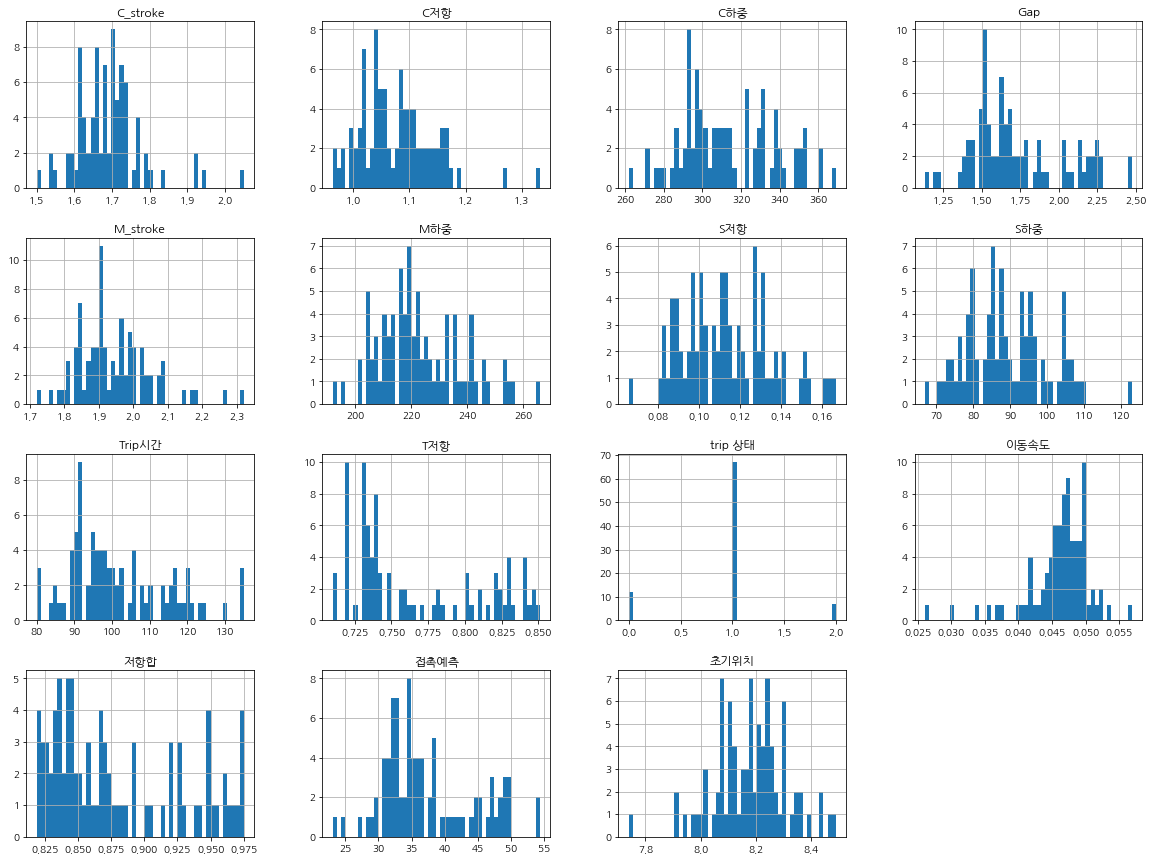

In [9]:
# 데이터가 이상치가 있는지 확인.
mccb_data.hist(bins=50, figsize=(20,15))
plt.show()

### 상관 관계 분석

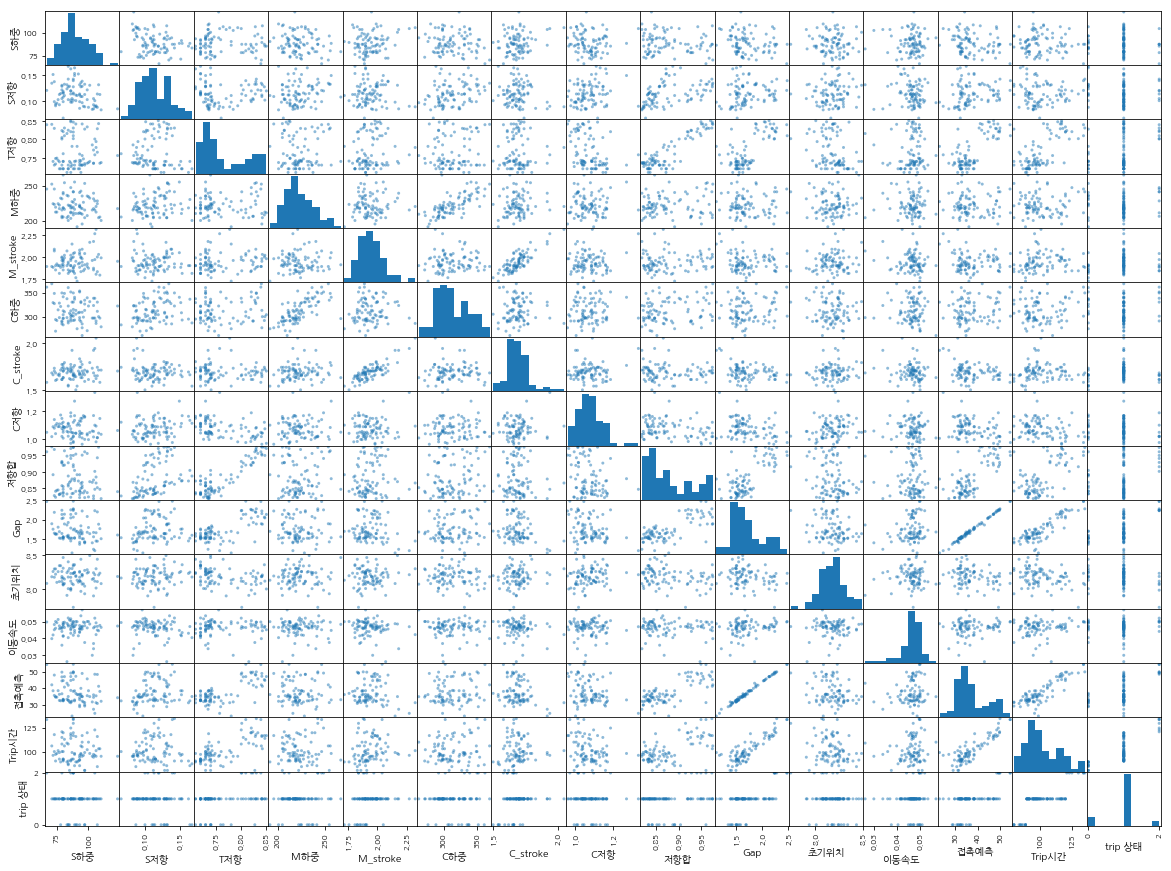

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(mccb_data, figsize = (20,15))
plt.show()

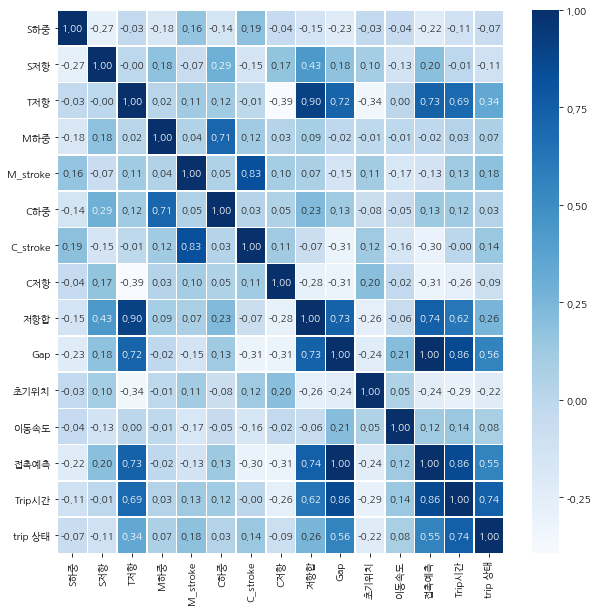

In [11]:
#히트맵 으로 상관관계 유우

plt.figure(figsize=(10,10))
sns.heatmap(data = mccb_data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### y를 Trip 시간으로 설정

In [13]:
mccb_y = mccb_data['Trip시간']
mccb_y.head(5)

0     95
1     95
2    106
3     84
4     91
Name: Trip시간, dtype: int64

In [14]:
# Trip시간에 대한 내용 확인

print(f"Trip 최소값 :  {mccb_y.min():.2f}")
print(f"Trip 최대값 :  {mccb_y.max():.2f}")
print(f"Trip 중앙값 :  {mccb_y.mean():.2f}")
print(f"Trip 최빈값 :  {mccb_y.value_counts().idxmax():.2f}")
print(f"Trip 최대값 - 최소값  :  {mccb_y.max() - mccb_y.min():.2f}")

Trip 최소값 :  80.00
Trip 최대값 :  135.00
Trip 중앙값 :  101.50
Trip 최빈값 :  95.00
Trip 최대값 - 최소값  :  55.00


In [15]:
# Gap에 대한 내용 확인

mccb_gap = mccb_data['Gap']

print(f"Gap 최소값 :  {mccb_gap.min():.2f}")
print(f"Gap 최대값 :  {mccb_gap.max():.2f}")
print(f"Gap 중앙값 :  {mccb_gap.mean():.2f}")
print(f"Gap 최빈값 :  {mccb_gap.value_counts().idxmax():.2f}")
print(f"Gap 최대 - 최소 값 :  {mccb_gap.max() - mccb_gap.min():.2f}")

Gap 최소값 :  1.13
Gap 최대값 :  2.48
Gap 중앙값 :  1.73
Gap 최빈값 :  1.53
Gap 최대 - 최소 값 :  1.34


#### X값으로 Feature 선택

In [16]:
mccb_x = mccb_data.drop(['Trip시간', 'trip 상태'] ,axis=1)
# mccb_x = mccb_data[['T저항', 'Gap', '초기위치', '이동속도', '접촉예측']]
# mccb_x = mccb_data[['T저항', 'Gap', '접촉예측']]
# mccb_x = mccb_data[['T저항', 'S저항', 'Gap']]
mccb_x.head(5)

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473,34.17
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299,31.62
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369,34.39
3,107,0.087,0.765,225,1.83,312,1.65,1.0107,0.852,1.437,8.435,0.0449,30.69
4,93,0.085,0.737,221,2.08,299,1.83,1.0552,0.822,1.408,8.247,0.0476,29.67


In [17]:
for columns in mccb_x.columns :
    print(f"columns : {columns}")

columns : S하중
columns : S저항
columns : T저항
columns : M하중
columns : M_stroke
columns : C하중
columns : C_stroke
columns : C저항
columns : 저항합
columns : Gap
columns : 초기위치
columns : 이동속도
columns : 접촉예측


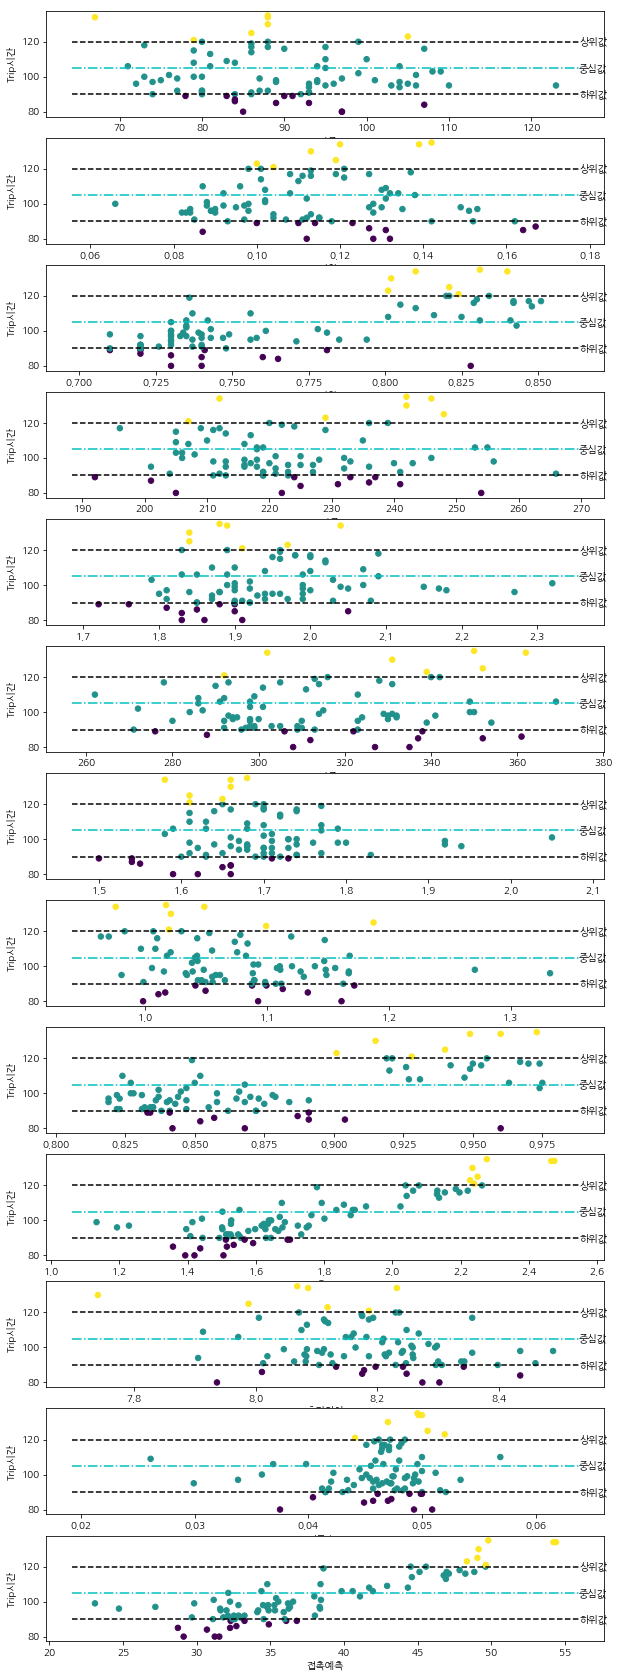

In [18]:
fig, axes = plt.subplots( len(mccb_x.columns), figsize = (10, 30))
color  = ['b' , 'g', 'r', 'c', 'm', 'y', 'k','w']
marker = ['.' ,'o', 'v','^','<','>', '*', 's', 'p', 'h', '+', 's', 'D']
line_style = ['-' , '--', '-.', '.', 'None']


for ax, columns in zip(axes[:], mccb_x.columns) :
    ax.scatter(mccb_data[columns], mccb_data['Trip시간'], c=mccb_data['trip 상태'] ,s=30) 
    ax.set_xlabel(columns)
    ax.set_ylabel('Trip시간')
    bounds = ax.get_xbound()
    ax.plot(bounds, [120, 120], '--', c ='k')
    ax.plot(bounds, [105, 105], '-.', c ='c')
    ax.plot(bounds, [90, 90], '--', c ='k')
    ax.text(bounds[1], 120, '상위값', va='center', fontdict={'size':10})
    ax.text(bounds[1], 105, '중심값', va='center', fontdict={'size':10})
    ax.text(bounds[1], 90, '하위값', va='center', fontdict={'size':10})
   

plt.show()


### Trip 시간/ trip 상태와 연관이 있어 보이는 것으로만 추려서 시각화로 분석

-  M_stroke

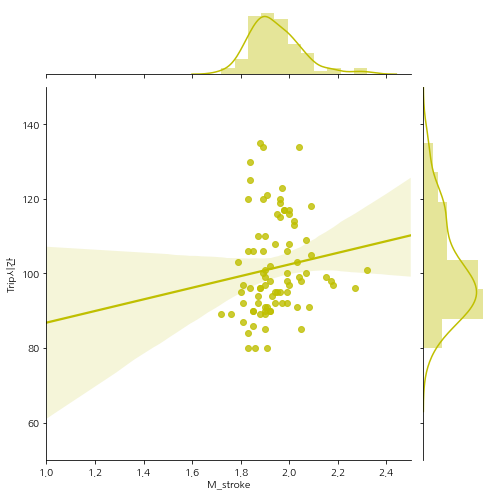

In [19]:
 sns.jointplot(data=mccb_data, x="M_stroke", y="Trip시간",  kind="reg",
                  xlim=(1, 2.5), ylim=(50, 150), color="y", height=7)
    
# M_stroke 따라 Trip 시간이 골고루 되어 있어, 무의미해 보인다.

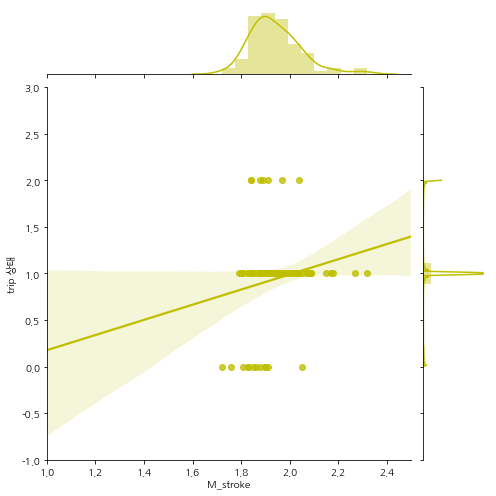

In [20]:
 sns.jointplot(data=mccb_data, x="M_stroke", y="trip 상태",  kind="reg",
                  xlim=(1, 2.5), ylim=(-1, 3), color="y", height=7)

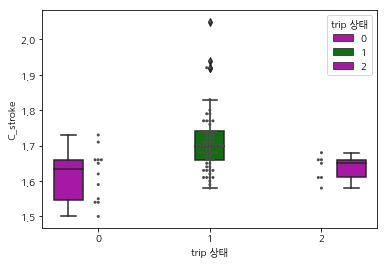

In [21]:
sns.boxplot(x="trip 상태", y="C_stroke",
            hue="trip 상태", palette=["m", "g"],
            data=mccb_data)

sns.swarmplot(x="trip 상태", y="C_stroke", data=mccb_data,
              size=3, color=".3", linewidth=0)

-  C_stroke

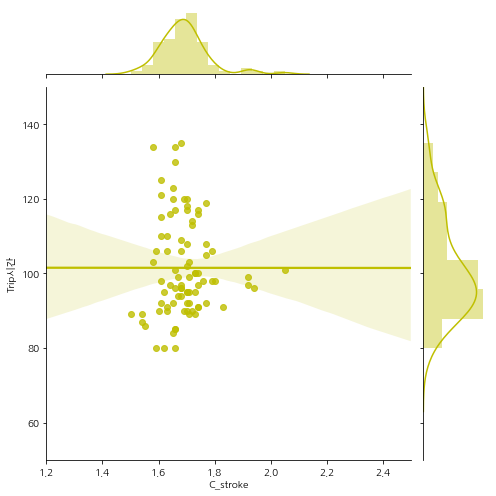

In [22]:
 sns.jointplot(data=mccb_data, x="C_stroke", y="Trip시간",  kind="reg",
                  xlim=(1.2, 2.5), ylim=(50, 150), color="y", height=7)

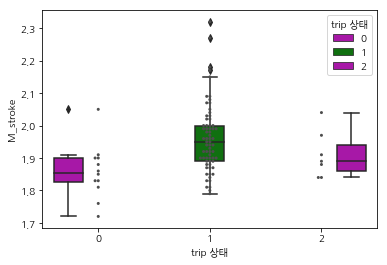

In [23]:
sns.boxplot(x="trip 상태", y="M_stroke",
            hue="trip 상태", palette=["m", "g"],
            data=mccb_data)
sns.swarmplot(x="trip 상태", y="M_stroke", data=mccb_data,
              size=3, color=".3", linewidth=0)

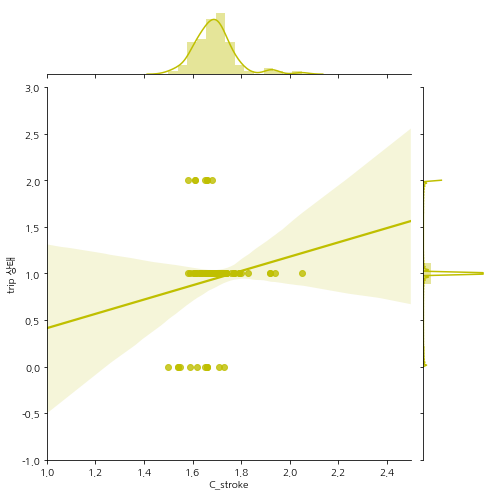

In [24]:
sns.jointplot(data=mccb_data, x="C_stroke", y="trip 상태",  kind="reg",
                  xlim=(1, 2.5), ylim=(-1, 3), color="y", height=7)

- 저항합

### 저항합은 Trip 시간에 영향을 주지 않음을 알아냄

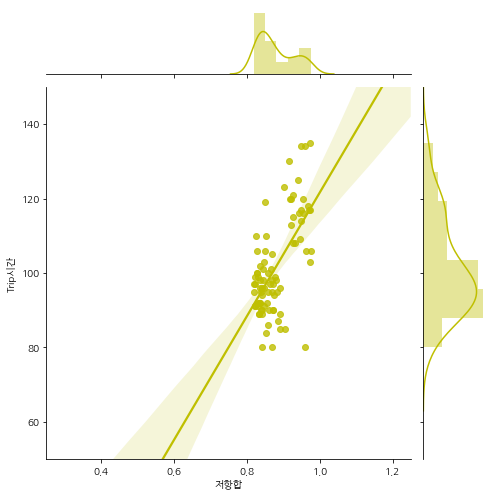

In [25]:
 sns.jointplot(data=mccb_data, x="저항합", y="Trip시간",kind="reg",
                  xlim=(0.25, 1.25), ylim=(50, 150), color="y", height=7)

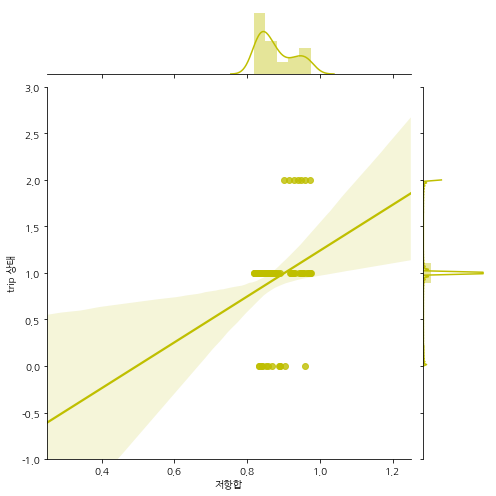

In [26]:
 sns.jointplot(data=mccb_data, x="저항합", y="trip 상태",  kind="reg",
                  xlim=(0.25, 1.25), ylim=(-1, 3), color="y", height=7)

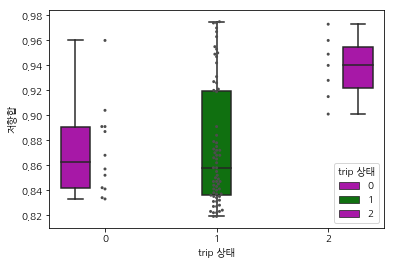

In [27]:
sns.boxplot(x="trip 상태", y="저항합",
            hue="trip 상태", palette=["m", "g"],
            data=mccb_data)
sns.swarmplot(x="trip 상태", y="저항합", data=mccb_data,
              size=3, color=".3", linewidth=0)

- Gap

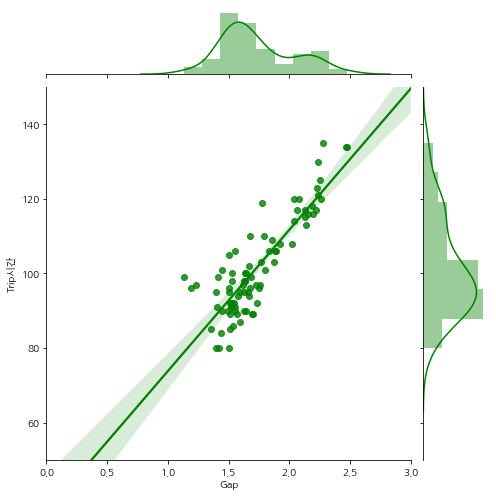

In [28]:
 sns.jointplot(data=mccb_data, x="Gap", y="Trip시간",kind="reg",
                  xlim=(0, 3), ylim=(50, 150), color="g", height=7)

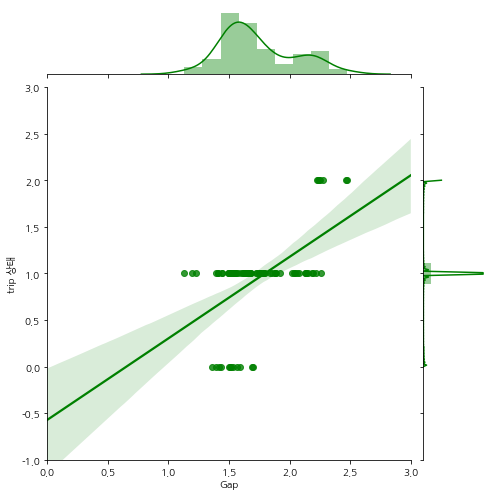

In [29]:
 sns.jointplot(data=mccb_data, x="Gap", y="trip 상태",  kind="reg",
                  xlim=(0, 3), ylim=(-1, 3), color="g", height=7)

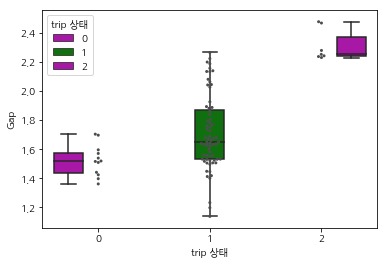

In [30]:
sns.boxplot(x="trip 상태", y="Gap",
            hue="trip 상태", palette=["m", "g"],
            data=mccb_data)
sns.swarmplot(x="trip 상태", y="Gap", data=mccb_data,
              size=3, color=".3", linewidth=0)

- 접촉예측

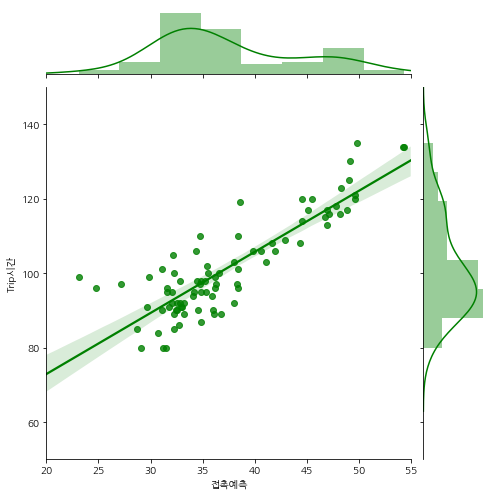

In [31]:
 sns.jointplot(data=mccb_data, x="접촉예측", y="Trip시간",kind="reg",
                  xlim=(20, 55), ylim=(50, 150), color="g", height=7)

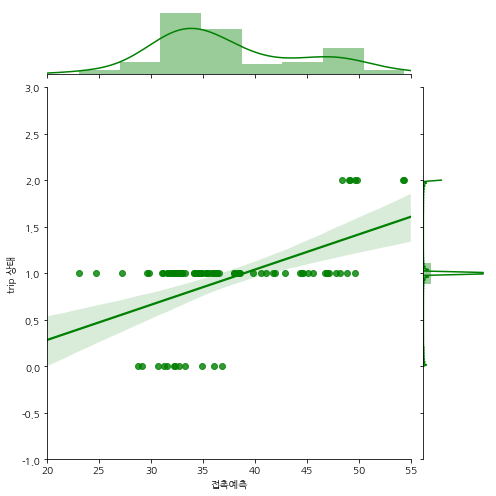

In [32]:
 sns.jointplot(data=mccb_data, x="접촉예측", y="trip 상태",  kind="reg",
                  xlim=(20, 55), ylim=(-1, 3), color="g", height=7)

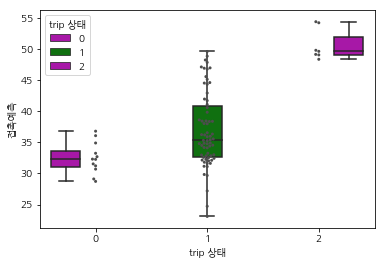

In [33]:
sns.boxplot(x="trip 상태", y="접촉예측",
            hue="trip 상태", palette=["m", "g"],
            data=mccb_data)
sns.swarmplot(x="trip 상태", y="접촉예측", data=mccb_data,
              size=3, color=".3", linewidth=0)

###  데이터 학습을 위해서, 훈련 데이터와 학습 데이터를 나누어 준다. ( 스케일링 미적용)

In [34]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(mccb_x, mccb_y , test_size =0.2)

###  데이터 학습을 위해서, 훈련 데이터와 학습 데이터를 나누어 준다. ( 스케일링 적용)

In [35]:
##선형 회귀 스케일링
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_ss = scaler.fit_transform(mccb_x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
x_ss, type(x_ss)

(array([[ 3.09885466, -1.40850919, -0.21826542, ...,  0.0449134 ,
          0.24649382, -0.4765423 ],
        [ 1.25071665, -1.45612389,  0.44155755, ..., -0.27181592,
         -3.45685309, -0.84931108],
        [ 1.34312355, -1.02759161, -0.69606826, ..., -0.17911466,
         -1.96700089, -0.44438186],
        ...,
        [-0.50501446, -0.55144464,  1.3516582 , ...,  0.67837206,
          0.39547904,  0.62422197],
        [-0.13538685,  0.6389228 ,  1.85221356, ...,  1.35818135,
          0.076225  ,  1.12417069],
        [ 0.51146145, -0.26575645,  1.73845098, ...,  0.09898914,
          0.1187922 ,  1.66797456]]), numpy.ndarray)

In [37]:
mccb_x_ss = pd.DataFrame(x_ss,columns=mccb_x.columns)

In [38]:
display(mccb_x_ss.head(5))

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측
0,3.098855,-1.408509,-0.218265,-0.342711,0.075940,0.422755,0.110289,-0.234359,-0.805171,-0.448773,0.044913,0.246494,-0.476542
1,1.250717,-1.456124,0.441558,-0.477599,0.170591,-0.636596,0.457297,-0.288609,-0.229673,-1.131143,-0.271816,-3.456853,-0.849311
2,1.343124,-1.027592,-0.696068,-0.342711,-0.870562,-0.636596,-1.162072,1.416406,-1.072366,-0.604164,-0.179115,-1.967001,-0.444382
3,1.620344,-1.265665,-0.013493,0.129399,-1.059863,-0.043359,-0.468057,-1.018666,-0.558529,-0.992642,1.968465,-0.264313,-0.985262
4,0.326648,-1.360894,-0.650563,-0.140378,1.306394,-0.594222,1.613988,-0.328909,-1.175134,-1.090606,0.516145,0.310345,-1.134370


In [39]:
np.random.seed(7)
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(mccb_x_ss, mccb_y , test_size =0.2)

## 알고리즘 예측 및 성능 함수

In [40]:

def alog_predict_func(algo, X, y, X_t, y_t, n_estimator = 10, alpha = 1) :
    
    if (algo == 'RandomForestRegressor') :
        algo_name = RandomForestRegressor(n_estimators= n_estimator, random_state=7)
    elif (algo == 'SVR') :
        algo_name = SVR(kernel='linear')   
    elif (algo == 'SVR') : 
        algo_name = LinearRegression()
    elif (algo == 'LinearRegression') :
        algo_name = LinearRegression()
    elif (algo == 'Ridge') :
        algo_name = Ridge(alpha= alpha)
    elif (algo == 'Lasso') :
        algo_name = Lasso(alpha= alpha)
    else :
        algo_name =""
      
    
    if algo_name != "" : 
        # 알고리즘 학습 및 예습
        algo_name.fit(X, y)
        y_pred = algo_name.predict(X_t)

        #알고리즘 성능
        train_score =  algo_name.score(X, y)
        test_score = algo_name.score(X_t, y_t)
        print(f"{algo} 훈련   score : {train_score}")
        print(f"{algo} 시험   score : {test_score}")


        #예측값 비교
        pred_data = X_t.copy()

        pred_data['y_pred'] = y_pred
        pred_data['trip시간'] = y_t
        pred_data['trip 차이'] = pred_data['trip시간'] - pred_data['y_pred']
        pred_data_dff_max = abs( pred_data['trip 차이']).max()
        pred_data_dff_min = abs( pred_data['trip 차이']).min()

        score_data= [train_score ,test_score , pred_data_dff_max, pred_data_dff_min]
        return (algo_name, pred_data, score_data)
    else :
        return (algo_name, 0, 0)
    


## RandomForestRegressor


RandomForestRegressor 의 n_estimator : 10
RandomForestRegressor 훈련   score : 0.9582077195797024
RandomForestRegressor 시험   score : 0.7447714486638538

RandomForestRegressor 의 n_estimator : 20
RandomForestRegressor 훈련   score : 0.966831360114622
RandomForestRegressor 시험   score : 0.7651986638537269

RandomForestRegressor 의 n_estimator : 30
RandomForestRegressor 훈련   score : 0.9709509245140315
RandomForestRegressor 시험   score : 0.7625148460696985

RandomForestRegressor 의 n_estimator : 40
RandomForestRegressor 훈련   score : 0.9699818191449512
RandomForestRegressor 시험   score : 0.7539787710970464

RandomForestRegressor 의 n_estimator : 50
RandomForestRegressor 훈련   score : 0.9715346962353081
RandomForestRegressor 시험   score : 0.7484834036568213

RandomForestRegressor 의 n_estimator : 60
RandomForestRegressor 훈련   score : 0.9701702751603428
RandomForestRegressor 시험   score : 0.7484560087513673

RandomForestRegressor 의 n_estimator : 70
RandomForestRegressor 훈련   score : 0.9704784427004419
Rando

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,105,0.089,0.758,216,2.27,298,1.94,1.3324,0.847,1.193,8.212,0.0469,24.72,94.777778,96,1.222222
45,89,0.149,0.730,256,2.05,341,1.76,1.2706,0.879,1.527,8.242,0.0447,32.83,93.388889,98,4.611111
17,96,0.089,0.747,227,1.84,300,1.68,1.1670,0.836,1.501,8.080,0.0497,31.59,91.655556,96,4.344444
20,74,0.090,0.733,220,1.90,295,1.68,1.0388,0.823,1.617,8.219,0.0460,34.77,92.655556,97,4.344444
12,94,0.108,0.742,219,1.83,291,1.63,1.0424,0.850,1.836,7.971,0.0466,39.83,112.000000,106,-6.000000
40,89,0.153,0.720,217,1.81,294,1.64,1.1671,0.873,1.755,8.356,0.0434,38.34,96.333333,97,0.666667
11,76,0.102,0.743,225,1.90,315,1.66,1.0888,0.845,1.801,8.256,0.0512,38.43,107.700000,101,-6.700000
82,67,0.120,0.840,246,1.89,362,1.58,1.0484,0.960,2.466,8.086,0.0497,54.21,126.655556,134,7.344444
85,95,0.108,0.842,196,1.98,278,1.66,0.9634,0.950,2.221,8.193,0.0467,48.84,123.666667,117,-6.666667
74,105,0.100,0.801,229,1.97,339,1.65,1.0992,0.901,2.228,8.118,0.0520,48.34,120.066667,123,2.933333


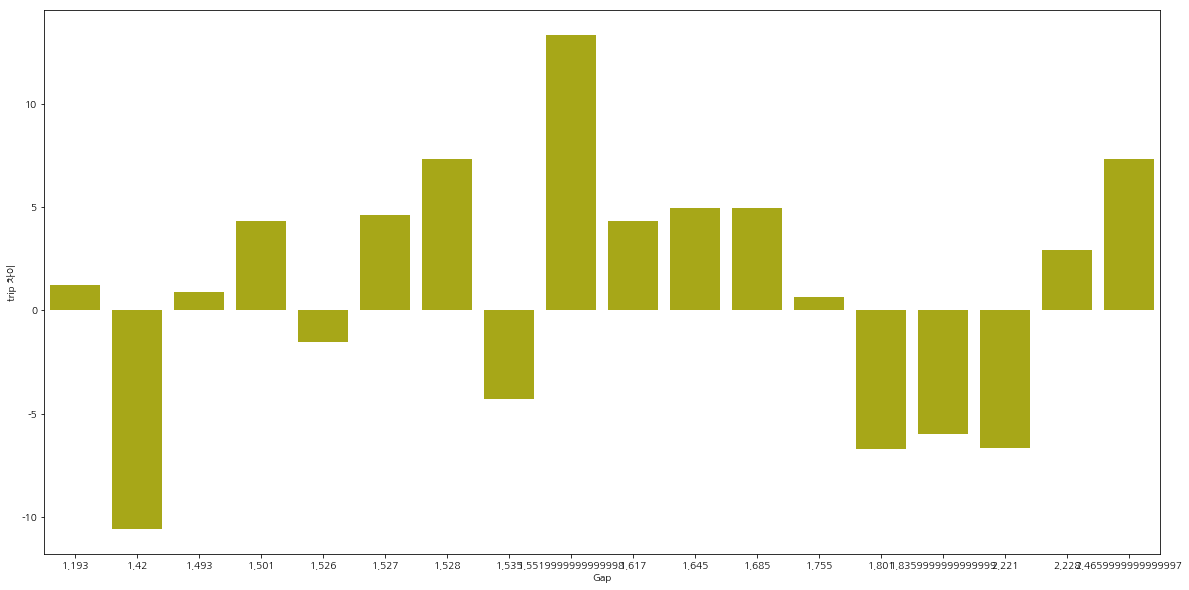

In [41]:
selected_n_estimator = 10
selected_score_rfr = [0,0,0,0]
selected_df_rfr = pd.DataFrame() 

for  estimator in range(10, 100, 10) :
    print(f"\nRandomForestRegressor 의 n_estimator : {estimator}")
    rfr, df_rfr, score_rfr = alog_predict_func('RandomForestRegressor', X_train, y_train, X_test, y_test, estimator)
    
    if  rfr != 0 :
        if (selected_score_rfr[1] < score_rfr[1]):
            selected_n_estimator = estimator
            selected_score_rfr = score_rfr
            selected_df_rfr = df_rfr.copy()

            
print(f"\nRandomForestRegressor n_estimator : {selected_n_estimator}, 훈련   score : {selected_score_rfr[1]}")
display(selected_df_rfr)

plt.figure(figsize=(20,10))
sns.barplot(data=selected_df_rfr, x="Gap", y="trip 차이", color='y')
#     sns.barplot(data=df_rfr, x="Gap", y="y_pred" , color='r' )
#     sns.barplot(data=df_rfr, x="Gap", y="trip시간", color='b')


In [42]:
#손실 함수
mse_rfr = np.mean(df_rfr['trip 차이']**2)
print(f"RandomForestRegressor 손실 : {mse_rfr}")

RandomForestRegressor 손실 : 36.83318930041153


## SVR

SVR 훈련   score : 0.7691040133789105
SVR 시험   score : 0.7470953572550271


,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,105,0.089,0.758,216,2.27,298,1.94,1.3324,0.847,1.193,8.212,0.0469,24.72,81.132819,96,14.867181
45,89,0.149,0.730,256,2.05,341,1.76,1.2706,0.879,1.527,8.242,0.0447,32.83,93.835637,98,4.164363
17,96,0.089,0.747,227,1.84,300,1.68,1.1670,0.836,1.501,8.080,0.0497,31.59,91.801019,96,4.198981
20,74,0.090,0.733,220,1.90,295,1.68,1.0388,0.823,1.617,8.219,0.0460,34.77,94.684973,97,2.315027
12,94,0.108,0.742,219,1.83,291,1.63,1.0424,0.850,1.836,7.971,0.0466,39.83,106.100853,106,-0.100853
40,89,0.153,0.720,217,1.81,294,1.64,1.1671,0.873,1.755,8.356,0.0434,38.34,102.327512,97,-5.327512
11,76,0.102,0.743,225,1.90,315,1.66,1.0888,0.845,1.801,8.256,0.0512,38.43,100.763296,101,0.236704
82,67,0.120,0.840,246,1.89,362,1.58,1.0484,0.960,2.466,8.086,0.0497,54.21,127.011974,134,6.988026
85,95,0.108,0.842,196,1.98,278,1.66,0.9634,0.950,2.221,8.193,0.0467,48.84,121.568817,117,-4.568817
74,105,0.100,0.801,229,1.97,339,1.65,1.0992,0.901,2.228,8.118,0.0520,48.34,121.252522,123,1.747478


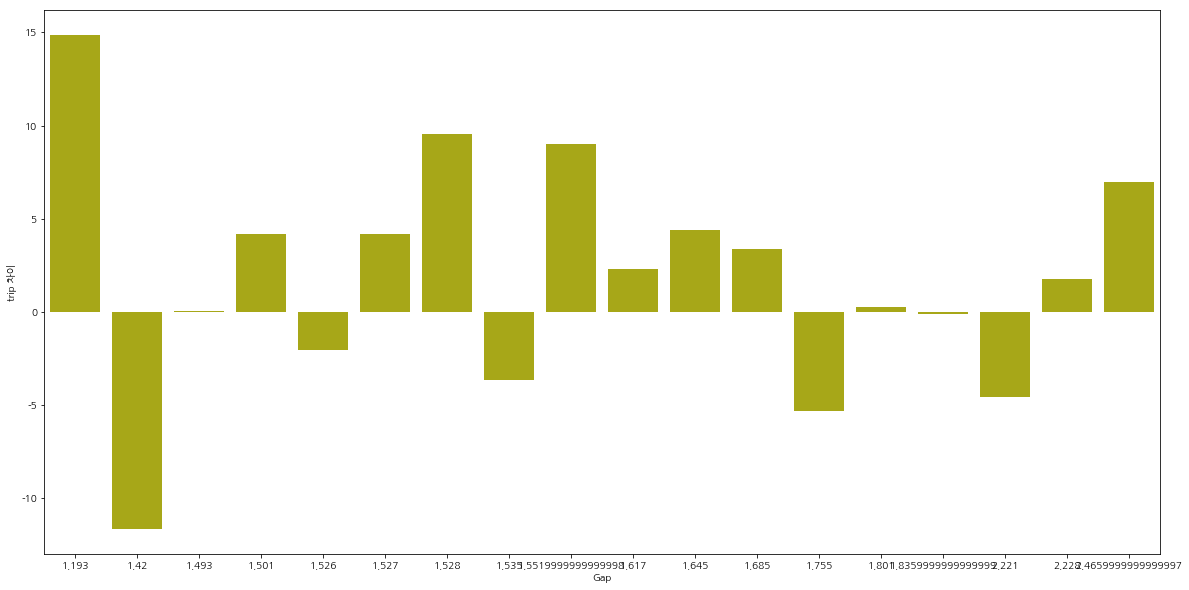

In [43]:
svr, df_svr,score_svr= alog_predict_func('SVR', X_train, y_train, X_test, y_test )

if  svr != 0 :
    display(df_svr)

    plt.figure(figsize=(20,10))

    sns.barplot(data=df_svr, x="Gap", y="trip 차이", color='y')
#     sns.barplot(data=df_svr, x="Gap", y="y_pred" , color='r' )
#     sns.barplot(data=df_svr, x="Gap", y="trip시간", color='b')

#### SVR계수 비교

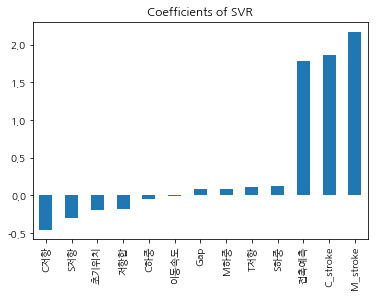

In [44]:
# SVR계수 비교
coef = pd.Series( np.ravel(svr.coef_), mccb_x.columns).sort_values() # np.ravel(svr.coef_) 2차원 배열을 1차원으로 변경
coef.plot(kind='bar', title = "Coefficients of SVR" )

In [45]:
#손실 함수
mse_svr = np.mean(df_svr['trip 차이']**2)
print(f"SVR의 손실 : {mse_svr}")

SVR의 손실 : 39.95893355370572


## 선형 회귀

LinearRegression 훈련   score : 0.8619845865127297
LinearRegression 시험   score : 0.7963768193245561


,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,105,0.089,0.758,216,2.27,298,1.94,1.3324,0.847,1.193,8.212,0.0469,24.72,87.448304,96,8.551696
45,89,0.149,0.730,256,2.05,341,1.76,1.2706,0.879,1.527,8.242,0.0447,32.83,92.974358,98,5.025642
17,96,0.089,0.747,227,1.84,300,1.68,1.1670,0.836,1.501,8.080,0.0497,31.59,92.115086,96,3.884914
20,74,0.090,0.733,220,1.90,295,1.68,1.0388,0.823,1.617,8.219,0.0460,34.77,97.587621,97,-0.587621
12,94,0.108,0.742,219,1.83,291,1.63,1.0424,0.850,1.836,7.971,0.0466,39.83,106.323106,106,-0.323106
40,89,0.153,0.720,217,1.81,294,1.64,1.1671,0.873,1.755,8.356,0.0434,38.34,93.882968,97,3.117032
11,76,0.102,0.743,225,1.90,315,1.66,1.0888,0.845,1.801,8.256,0.0512,38.43,102.692500,101,-1.692500
82,67,0.120,0.840,246,1.89,362,1.58,1.0484,0.960,2.466,8.086,0.0497,54.21,129.229617,134,4.770383
85,95,0.108,0.842,196,1.98,278,1.66,0.9634,0.950,2.221,8.193,0.0467,48.84,120.920782,117,-3.920782
74,105,0.100,0.801,229,1.97,339,1.65,1.0992,0.901,2.228,8.118,0.0520,48.34,122.456784,123,0.543216


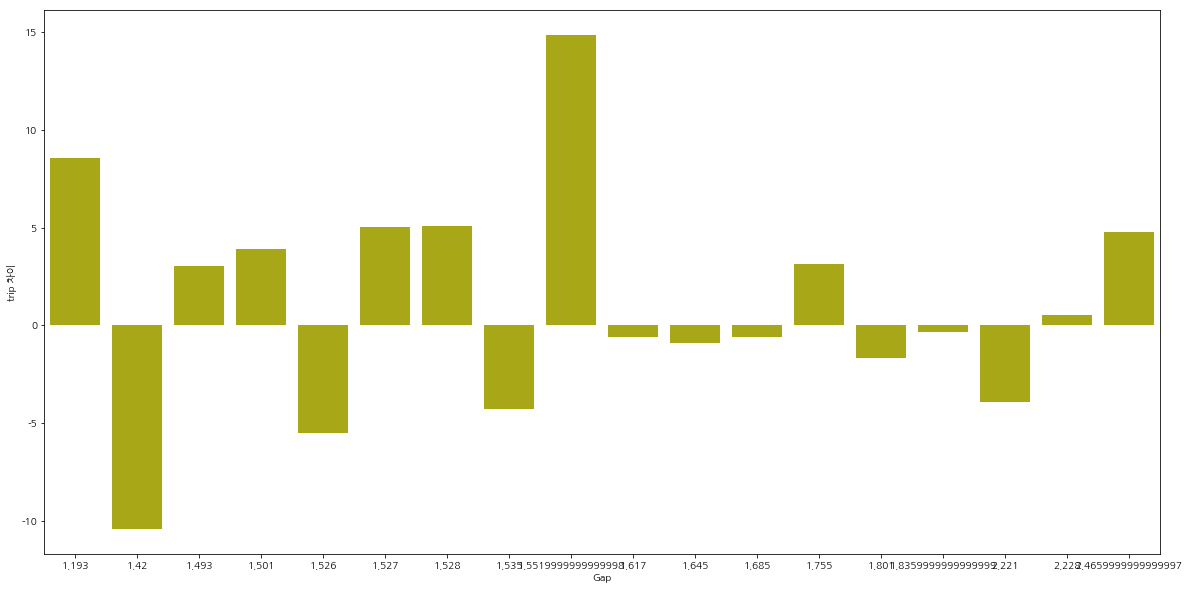

In [46]:
lr, df_lr,score_lr= alog_predict_func('LinearRegression', X_train, y_train, X_test, y_test )

if  lr != 0 :
    display(df_lr)

    plt.figure(figsize=(20,10))

    sns.barplot(data=df_lr, x="Gap", y="trip 차이", color='y')
#     sns.barplot(data=df_lr, x="Gap", y="y_pred" , color='r' )
#     sns.barplot(data=df_lr, x="Gap", y="trip시간", color='b')

#### LinearRegression 계수 비교

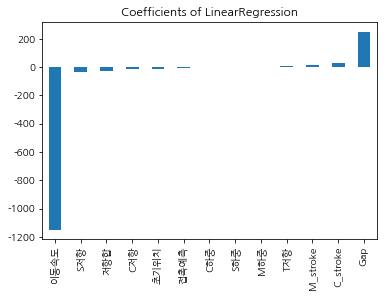

In [47]:
#LinearRegression계수 비교
coef = pd.Series(lr.coef_, mccb_x.columns).sort_values()
coef.plot(kind='bar', title = "Coefficients of LinearRegression" )

In [48]:
#손실 함수
mse_lr = np.mean(df_lr['trip 차이']**2)
print(f"LinearRegression의 손실 : {mse_lr}")

LinearRegression의 손실 : 32.17246254672014


## LinearRegression( 스케일링)

LinearRegression 훈련   score : 0.8651106437758275
LinearRegression 시험   score : 0.8139743829948605


,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,1.435530,-1.170436,-0.172760,-0.477599,3.104748,-0.636596,2.886349,3.967729,-0.661297,-1.816891,0.245766,0.161359,-1.857980,86.705891,96,9.294109
45,-0.042980,1.686446,-0.809831,2.220168,1.022443,1.185488,0.804304,3.009821,-0.003585,-0.688615,0.477519,-0.306880,-0.672429,93.289124,98,4.710876
17,0.603868,-1.170436,-0.423038,0.264287,-0.965212,-0.551848,-0.121049,1.404006,-0.887385,-0.776445,-0.773948,0.757300,-0.853697,91.587893,96,4.412107
20,-1.429083,-1.122821,-0.741573,-0.207822,-0.397311,-0.763718,-0.121049,-0.583112,-1.154580,-0.384589,0.299842,-0.030193,-0.388832,97.120599,97,-0.120599
12,0.419055,-0.265756,-0.536801,-0.275266,-1.059863,-0.933214,-0.699395,-0.527311,-0.599636,0.355208,-1.615984,0.097509,0.350858,105.852049,106,0.147951
40,-0.042980,1.876905,-1.037356,-0.410155,-1.249163,-0.806092,-0.583726,1.405556,-0.126906,0.081584,1.358181,-0.583567,0.133044,93.859482,97,3.140518
11,-1.244270,-0.551445,-0.514048,0.129399,-0.397311,0.083763,-0.352387,0.191895,-0.702403,0.236975,0.585671,1.076554,0.146201,102.452384,101,-1.452384
82,-2.075932,0.305620,1.692946,1.545726,-0.491961,2.075342,-1.277741,-0.434310,1.661248,2.483392,-0.727597,0.757300,2.452982,129.595611,134,4.404389
85,0.511461,-0.265756,1.738451,-1.826482,0.359891,-1.484077,-0.352387,-1.751822,1.455713,1.655765,0.098989,0.118792,1.667975,118.791697,117,-1.791697
74,1.435530,-0.646674,0.805598,0.399175,0.265241,1.100739,-0.468057,0.353097,0.448592,1.679411,-0.480394,1.246823,1.594883,122.097453,123,0.902547


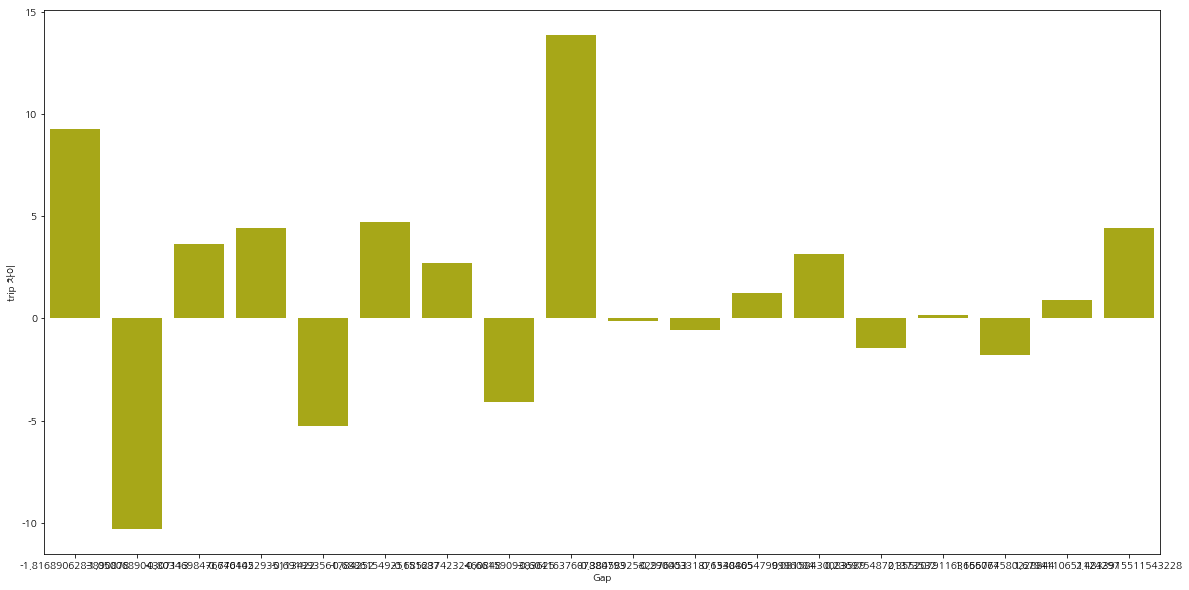

In [49]:
lr_ss, df_lr_ss,score_lr_ss= alog_predict_func('LinearRegression', X_train_ss, y_train_ss, X_test_ss, y_test_ss )

if  lr_ss != 0 :
    display(df_lr_ss)

    plt.figure(figsize=(20,10))

    sns.barplot(data=df_lr_ss, x="Gap", y="trip 차이", color='y')
#     sns.barplot(data=df_lr_ss, x="Gap", y="y_pred" , color='r' )
#     sns.barplot(data=df_lr_ss, x="Gap", y="trip시간", color='b')

#### LinearRegression( 스케일링) 계수 비교

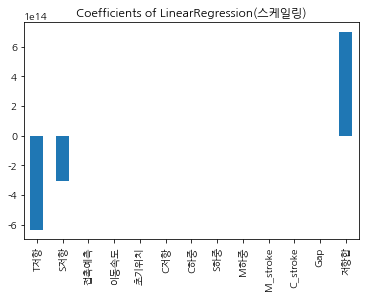

In [50]:
#LinearRegression( 스케일링) 계수 비교
coef = pd.Series(lr_ss.coef_, mccb_x.columns).sort_values()
coef.plot(kind='bar', title = "Coefficients of LinearRegression(스케일링)" )

In [51]:
#손실 함수
mse_lr_ss = np.mean(df_lr_ss['trip 차이']**2)
print(f"LinearRegression(스케일링) 의 손실 : {mse_lr_ss}")

LinearRegression(스케일링) 의 손실 : 29.392047486812046


## Ridge (스케일링)


Ridge 의 alpha : 0.05
Ridge 훈련   score : 0.8597793897927973
Ridge 시험   score : 0.7986269231790818

Ridge 의 alpha : 0.1
Ridge 훈련   score : 0.8596378558459301
Ridge 시험   score : 0.7984589254143696

Ridge 의 alpha : 0.15000000000000002
Ridge 훈련   score : 0.8595855562446798
Ridge 시험   score : 0.7982503462998616

Ridge 의 alpha : 0.2
Ridge 훈련   score : 0.8595564138314828
Ridge 시험   score : 0.7980309132843827

Ridge 의 alpha : 0.25
Ridge 훈련   score : 0.8595361953395741
Ridge 시험   score : 0.7978068028353755

Ridge 의 alpha : 0.3
Ridge 훈련   score : 0.8595200120844182
Ridge 시험   score : 0.7975801137475553

Ridge 의 alpha : 0.35000000000000003
Ridge 훈련   score : 0.8595057377067676
Ridge 시험   score : 0.7973517603225391

Ridge 의 alpha : 0.4
Ridge 훈련   score : 0.8594923025061094
Ridge 시험   score : 0.7971222082667271

Ridge 의 alpha : 0.45
Ridge 훈련   score : 0.8594791126176076
Ridge 시험   score : 0.7968917225206248

Ridge 의 alpha : 0.5
Ridge 훈련   score : 0.8594658143055897
Ridge 시험   score : 0.796660467081

Ridge 의 alpha : 4.6
Ridge 훈련   score : 0.8562311030239572
Ridge 시험   score : 0.7770042142850428

Ridge 의 alpha : 4.65
Ridge 훈련   score : 0.8561711392175859
Ridge 시험   score : 0.7767643894996615

Ridge 의 alpha : 4.7
Ridge 훈련   score : 0.8561108294144011
Ridge 시험   score : 0.7765246868596658

Ridge 의 alpha : 4.75
Ridge 훈련   score : 0.8560501777628303
Ridge 시험   score : 0.7762851093725579

Ridge 의 alpha : 4.8
Ridge 훈련   score : 0.8559891883628802
Ridge 시험   score : 0.7760456599968706

Ridge 의 alpha : 4.8500000000000005
Ridge 훈련   score : 0.8559278652667393
Ridge 시험   score : 0.7758063416428869

Ridge 의 alpha : 4.9
Ridge 훈련   score : 0.8558662124793762
Ridge 시험   score : 0.7755671571733532

Ridge 의 alpha : 4.95
Ridge 훈련   score : 0.8558042339591307
Ridge 시험   score : 0.7753281094041796

Ridge 의 alpha : 5.0
Ridge 훈련   score : 0.8557419336182962
Ridge 시험   score : 0.7750892011051239

Ridge 의 alpha : 5.05
Ridge 훈련   score : 0.8556793153236969
Ridge 시험   score : 0.7748504350004702

Ridge 의 alp

Ridge 의 alpha : 8.9
Ridge 훈련   score : 0.850149258794816
Ridge 시험   score : 0.7570500351114319

Ridge 의 alpha : 8.950000000000001
Ridge 훈련   score : 0.8500708032893226
Ridge 시험   score : 0.756827897314949

Ridge 의 alpha : 9.000000000000002
Ridge 훈련   score : 0.8499922299748199
Ridge 시험   score : 0.7566060159214799

Ridge 의 alpha : 9.05
Ridge 훈련   score : 0.849913540423311
Ridge 시험   score : 0.7563843914980009

Ridge 의 alpha : 9.100000000000001
Ridge 훈련   score : 0.8498347361897929
Ridge 시험   score : 0.7561630245968827

Ridge 의 alpha : 9.15
Ridge 훈련   score : 0.8497558188124519
Ridge 시험   score : 0.7559419157560947

Ridge 의 alpha : 9.200000000000001
Ridge 훈련   score : 0.8496767898128561
Ridge 시험   score : 0.7557210654993961

Ridge 의 alpha : 9.250000000000002
Ridge 훈련   score : 0.8495976506961445
Ridge 시험   score : 0.7555004743365341

Ridge 의 alpha : 9.3
Ridge 훈련   score : 0.8495184029512156
Ridge 시험   score : 0.7552801427634336

Ridge 의 alpha : 9.350000000000001
Ridge 훈련   score : 0.849

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,1.435530,-1.170436,-0.172760,-0.477599,3.104748,-0.636596,2.886349,3.967729,-0.661297,-1.816891,0.245766,0.161359,-1.857980,87.980248,96,8.019752
45,-0.042980,1.686446,-0.809831,2.220168,1.022443,1.185488,0.804304,3.009821,-0.003585,-0.688615,0.477519,-0.306880,-0.672429,93.113333,98,4.886667
17,0.603868,-1.170436,-0.423038,0.264287,-0.965212,-0.551848,-0.121049,1.404006,-0.887385,-0.776445,-0.773948,0.757300,-0.853697,92.045460,96,3.954540
20,-1.429083,-1.122821,-0.741573,-0.207822,-0.397311,-0.763718,-0.121049,-0.583112,-1.154580,-0.384589,0.299842,-0.030193,-0.388832,97.360394,97,-0.360394
12,0.419055,-0.265756,-0.536801,-0.275266,-1.059863,-0.933214,-0.699395,-0.527311,-0.599636,0.355208,-1.615984,0.097509,0.350858,106.127793,106,-0.127793
40,-0.042980,1.876905,-1.037356,-0.410155,-1.249163,-0.806092,-0.583726,1.405556,-0.126906,0.081584,1.358181,-0.583567,0.133044,94.037261,97,2.962739
11,-1.244270,-0.551445,-0.514048,0.129399,-0.397311,0.083763,-0.352387,0.191895,-0.702403,0.236975,0.585671,1.076554,0.146201,102.454938,101,-1.454938
82,-2.075932,0.305620,1.692946,1.545726,-0.491961,2.075342,-1.277741,-0.434310,1.661248,2.483392,-0.727597,0.757300,2.452982,128.808811,134,5.191189
85,0.511461,-0.265756,1.738451,-1.826482,0.359891,-1.484077,-0.352387,-1.751822,1.455713,1.655765,0.098989,0.118792,1.667975,120.855945,117,-3.855945
74,1.435530,-0.646674,0.805598,0.399175,0.265241,1.100739,-0.468057,0.353097,0.448592,1.679411,-0.480394,1.246823,1.594883,122.190274,123,0.809726


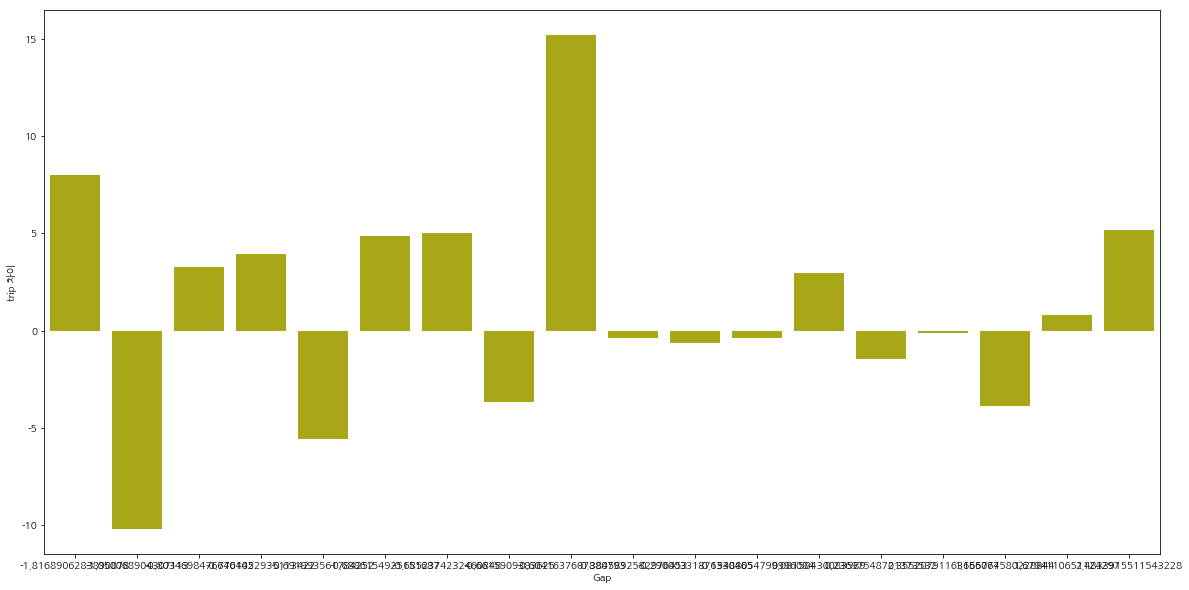

In [52]:
selected_ridge_alpha = 0.0
selected_score_ridge_ss = [0,0,0,0]
selected_df_ridge_ss = pd.DataFrame() 

# for  ridge_alpha  in range(1,100, 1):
for  ridge_alpha  in frange(0.05, 10, 0.05):
    
#     r_alpha = ridge_alpha * 0.1
    r_alpha = ridge_alpha
    print(f"\nRidge 의 alpha : {r_alpha}")
    
    ridge_ss, df_ridge_ss,score_ridge_ss= alog_predict_func('Ridge', X_train_ss, y_train_ss, X_test_ss, y_test_ss,0,  r_alpha )
    
    if  ridge_ss != 0 :
        if (selected_score_ridge_ss[1] < score_ridge_ss[1]):
            selected_ridge_alpha = r_alpha
            selected_score_ridge_ss = score_ridge_ss
            selected_df_ridge_ss = df_ridge_ss.copy()


print(f"\nRidge의  alpha : {selected_ridge_alpha}, 훈련   score : {selected_score_ridge_ss[1]}")
display(selected_df_ridge_ss)

plt.figure(figsize=(20,10))
sns.barplot(data=selected_df_ridge_ss, x="Gap", y="trip 차이", color='y')
#     sns.barplot(data=df_rfr, x="Gap", y="y_pred" , color='r' )
#     sns.barplot(data=df_rfr, x="Gap", y="trip시간", color='b')


#### ridge_ss 계수 비교

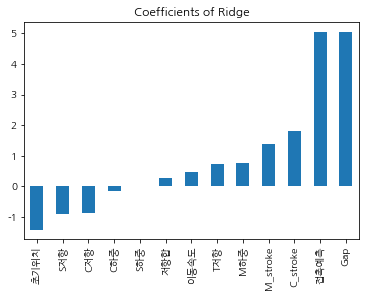

In [53]:
#ridge_ss 계수 비교
coef = pd.Series(ridge_ss.coef_, mccb_x.columns).sort_values()
coef.plot(kind='bar', title = "Coefficients of Ridge" )

In [54]:
df_ridge_ss

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,1.435530,-1.170436,-0.172760,-0.477599,3.104748,-0.636596,2.886349,3.967729,-0.661297,-1.816891,0.245766,0.161359,-1.857980,88.977393,96,7.022607
45,-0.042980,1.686446,-0.809831,2.220168,1.022443,1.185488,0.804304,3.009821,-0.003585,-0.688615,0.477519,-0.306880,-0.672429,93.175599,98,4.824401
17,0.603868,-1.170436,-0.423038,0.264287,-0.965212,-0.551848,-0.121049,1.404006,-0.887385,-0.776445,-0.773948,0.757300,-0.853697,92.458179,96,3.541821
20,-1.429083,-1.122821,-0.741573,-0.207822,-0.397311,-0.763718,-0.121049,-0.583112,-1.154580,-0.384589,0.299842,-0.030193,-0.388832,96.699884,97,0.300116
12,0.419055,-0.265756,-0.536801,-0.275266,-1.059863,-0.933214,-0.699395,-0.527311,-0.599636,0.355208,-1.615984,0.097509,0.350858,104.420024,106,1.579976
40,-0.042980,1.876905,-1.037356,-0.410155,-1.249163,-0.806092,-0.583726,1.405556,-0.126906,0.081584,1.358181,-0.583567,0.133044,93.366977,97,3.633023
11,-1.244270,-0.551445,-0.514048,0.129399,-0.397311,0.083763,-0.352387,0.191895,-0.702403,0.236975,0.585671,1.076554,0.146201,101.470930,101,-0.470930
82,-2.075932,0.305620,1.692946,1.545726,-0.491961,2.075342,-1.277741,-0.434310,1.661248,2.483392,-0.727597,0.757300,2.452982,127.170958,134,6.829042
85,0.511461,-0.265756,1.738451,-1.826482,0.359891,-1.484077,-0.352387,-1.751822,1.455713,1.655765,0.098989,0.118792,1.667975,120.021912,117,-3.021912
74,1.435530,-0.646674,0.805598,0.399175,0.265241,1.100739,-0.468057,0.353097,0.448592,1.679411,-0.480394,1.246823,1.594883,119.661273,123,3.338727


In [55]:
#손실 함수
mse_ridge = np.mean(df_ridge_ss['trip 차이']**2)
print(f"Ridge 의 손실 : {mse_ridge}")

Ridge 의 손실 : 39.11453425599252


## Lasso (스케일링)


Lasso 의 alpha : 0.05
Lasso 훈련   score : 0.8595390698887251
Lasso 시험   score : 0.7962602974630179

Lasso 의 alpha : 0.1
Lasso 훈련   score : 0.8584627946313199
Lasso 시험   score : 0.7937974916612249

Lasso 의 alpha : 0.15000000000000002
Lasso 훈련   score : 0.8577889730036896
Lasso 시험   score : 0.7942428395883981

Lasso 의 alpha : 0.2
Lasso 훈련   score : 0.857222071794785
Lasso 시험   score : 0.7953084769957816

Lasso 의 alpha : 0.25
Lasso 훈련   score : 0.8564926072522255
Lasso 시험   score : 0.7962333879180643

Lasso 의 alpha : 0.3
Lasso 훈련   score : 0.855600568806661
Lasso 시험   score : 0.7970176649598976

Lasso 의 alpha : 0.35000000000000003
Lasso 훈련   score : 0.854545962400594
Lasso 시험   score : 0.7976612486892661

Lasso 의 alpha : 0.4
Lasso 훈련   score : 0.8533288589700809
Lasso 시험   score : 0.7981639519027645

Lasso 의 alpha : 0.45
Lasso 훈련   score : 0.8519491408239193
Lasso 시험   score : 0.7985261711616315

Lasso 의 alpha : 0.5
Lasso 훈련   score : 0.8504069224983655
Lasso 시험   score : 0.798747637055344

Lasso 훈련   score : 0.6399181470441742
Lasso 시험   score : 0.6727662321897405

Lasso 의 alpha : 4.25
Lasso 훈련   score : 0.6371367142106159
Lasso 시험   score : 0.6706785549834409

Lasso 의 alpha : 4.3
Lasso 훈련   score : 0.6343225709461326
Lasso 시험   score : 0.6685582516086612

Lasso 의 alpha : 4.35
Lasso 훈련   score : 0.6314756170850593
Lasso 시험   score : 0.6664054533459791

Lasso 의 alpha : 4.4
Lasso 훈련   score : 0.6285957342814785
Lasso 시험   score : 0.6642203064051213

Lasso 의 alpha : 4.45
Lasso 훈련   score : 0.6256836741552204
Lasso 시험   score : 0.6620019239901724

Lasso 의 alpha : 4.5
Lasso 훈련   score : 0.622737564002934
Lasso 시험   score : 0.6597525186001464

Lasso 의 alpha : 4.55
Lasso 훈련   score : 0.6197591153447481
Lasso 시험   score : 0.6574700726847904

Lasso 의 alpha : 4.6
Lasso 훈련   score : 0.6167603983027838
Lasso 시험   score : 0.6551409089949015

Lasso 의 alpha : 4.65
Lasso 훈련   score : 0.6140046935549996
Lasso 시험   score : 0.6524661971911998

Lasso 의 alpha : 4.7
Lasso 훈련   score : 0.61121

Lasso 의 alpha : 9.350000000000001
Lasso 훈련   score : 0.22194983430272952
Lasso 시험   score : 0.24112482559021717

Lasso 의 alpha : 9.4
Lasso 훈련   score : 0.21636394630046507
Lasso 시험   score : 0.23504759331730218

Lasso 의 alpha : 9.450000000000001
Lasso 훈련   score : 0.21074826689552176
Lasso 시험   score : 0.22893454503944777

Lasso 의 alpha : 9.500000000000002
Lasso 훈련   score : 0.20510279608789964
Lasso 시험   score : 0.2227856807566546

Lasso 의 alpha : 9.55
Lasso 훈련   score : 0.19942753387759904
Lasso 시험   score : 0.2166010004689225

Lasso 의 alpha : 9.600000000000001
Lasso 훈련   score : 0.19372248026461944
Lasso 시험   score : 0.210380504176251

Lasso 의 alpha : 9.650000000000002
Lasso 훈련   score : 0.18798763524896112
Lasso 시험   score : 0.20412419187864017

Lasso 의 alpha : 9.700000000000001
Lasso 훈련   score : 0.18222299883062454
Lasso 시험   score : 0.19783206357609084

Lasso 의 alpha : 9.750000000000002
Lasso 훈련   score : 0.1764285710096083
Lasso 시험   score : 0.19150411926860197

Lasso 의 alpha :

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,y_pred,trip시간,trip 차이
13,1.435530,-1.170436,-0.172760,-0.477599,3.104748,-0.636596,2.886349,3.967729,-0.661297,-1.816891,0.245766,0.161359,-1.857980,88.117764,96,7.882236
45,-0.042980,1.686446,-0.809831,2.220168,1.022443,1.185488,0.804304,3.009821,-0.003585,-0.688615,0.477519,-0.306880,-0.672429,93.057959,98,4.942041
17,0.603868,-1.170436,-0.423038,0.264287,-0.965212,-0.551848,-0.121049,1.404006,-0.887385,-0.776445,-0.773948,0.757300,-0.853697,92.063848,96,3.936152
20,-1.429083,-1.122821,-0.741573,-0.207822,-0.397311,-0.763718,-0.121049,-0.583112,-1.154580,-0.384589,0.299842,-0.030193,-0.388832,96.944473,97,0.055527
12,0.419055,-0.265756,-0.536801,-0.275266,-1.059863,-0.933214,-0.699395,-0.527311,-0.599636,0.355208,-1.615984,0.097509,0.350858,104.896719,106,1.103281
40,-0.042980,1.876905,-1.037356,-0.410155,-1.249163,-0.806092,-0.583726,1.405556,-0.126906,0.081584,1.358181,-0.583567,0.133044,96.053338,97,0.946662
11,-1.244270,-0.551445,-0.514048,0.129399,-0.397311,0.083763,-0.352387,0.191895,-0.702403,0.236975,0.585671,1.076554,0.146201,102.260015,101,-1.260015
82,-2.075932,0.305620,1.692946,1.545726,-0.491961,2.075342,-1.277741,-0.434310,1.661248,2.483392,-0.727597,0.757300,2.452982,126.946094,134,7.053906
85,0.511461,-0.265756,1.738451,-1.826482,0.359891,-1.484077,-0.352387,-1.751822,1.455713,1.655765,0.098989,0.118792,1.667975,120.279455,117,-3.279455
74,1.435530,-0.646674,0.805598,0.399175,0.265241,1.100739,-0.468057,0.353097,0.448592,1.679411,-0.480394,1.246823,1.594883,120.085852,123,2.914148


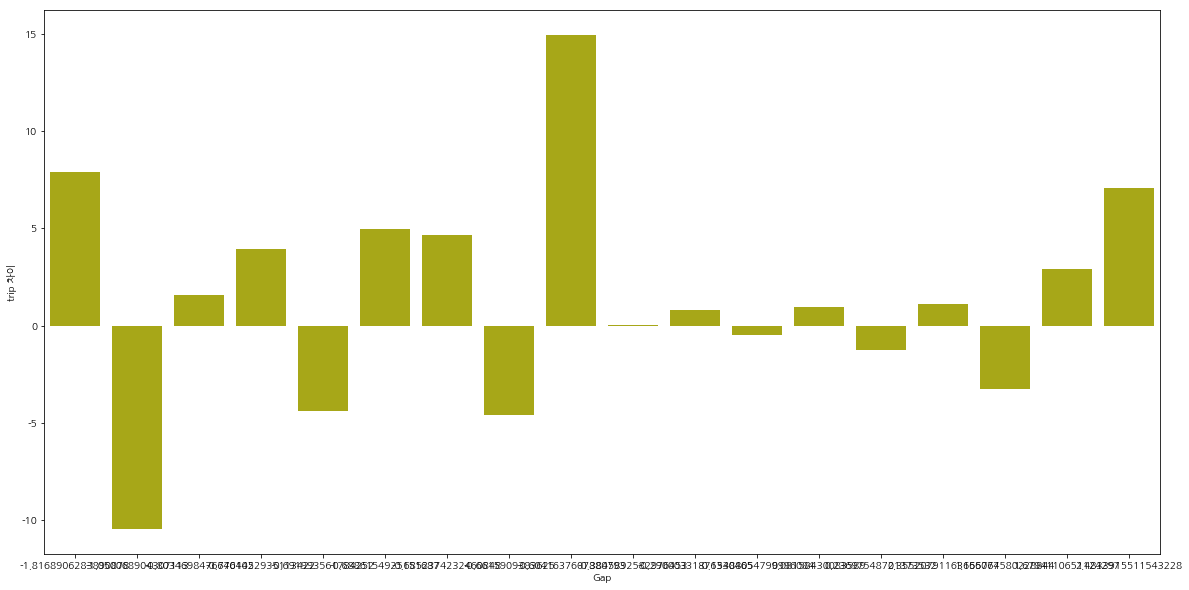

In [56]:
selected_lasso_alpha = 0.0
selected_score_lasso_ss = [0,0,0,0]
selected_df_lasso_ss = pd.DataFrame() 

#for  lasso_alpha  in range(-10,100, 10):
for  lasso_alpha  in frange(0.05, 10, 0.05):

        
    print(f"\nLasso 의 alpha : {lasso_alpha}")
    
    lasso_ss, df_lasso_ss,score_lasso_ss= alog_predict_func('Lasso', X_train_ss, y_train_ss, X_test_ss, y_test_ss, 0, lasso_alpha )

    if  lasso_ss != 0 :
         if (selected_score_lasso_ss[1] < score_lasso_ss[1]):
            selected_lasso_alpha = lasso_alpha
            selected_score_lasso_ss = score_lasso_ss
            selected_df_lasso_ss = df_lasso_ss.copy()

  
print(f"\nLasso의  alpha : {selected_lasso_alpha}, 훈련   score : {selected_score_lasso_ss[1]}")
display(selected_df_lasso_ss)

plt.figure(figsize=(20,10))

sns.barplot(data=selected_df_lasso_ss, x="Gap", y="trip 차이", color='y')
    #     sns.barplot(data=df_lasso_ss, x="Gap", y="y_pred" , color='r' )
    #     sns.barplot(data=df_lasso_ss, x="Gap", y="trip시간", color='b')


#### Lasso 계수 비교

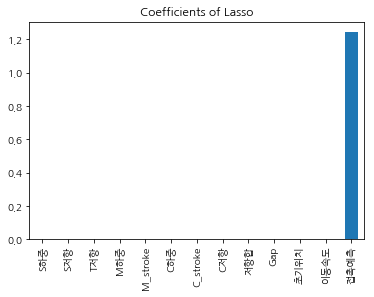

In [57]:
# Lasso 계수 비교
coef = pd.Series(lasso_ss.coef_, mccb_x.columns).sort_values()
coef.plot(kind='bar', title = "Coefficients of Lasso" )

In [58]:
#손실 함수
mse_lasso = np.mean(df_lasso_ss['trip 차이']**2)
print(f"Lasso 의 손실 : {mse_lasso}")

Lasso 의 손실 : 131.79819924569745


## 교차 검증 CV = 5

## 모델별 예측값 성능 비교
1. RandomForestRegresstion
2. SVR
3. 선형 회귀 (스케링 미포함)
4 선형 회귀 (스케링 포함)
5. Ridge
6. Lasso

In [59]:
trip_comp =  {   'Trip시간': y_test,
                 'RandomForestRegressor' : selected_df_rfr['y_pred'],
                 'SVR' : df_svr['y_pred'],
                 'LinearRegressor': df_lr['y_pred'],
                 'LinearRegressor(SS)': df_lr_ss['y_pred'],
                 'Ridge' : selected_df_ridge_ss['y_pred'],
                 'Lasso' : selected_df_lasso_ss['y_pred']}

df_trip_comp  = pd.DataFrame(trip_comp)
display(df_trip_comp)

,Trip시간,RandomForestRegressor,SVR,LinearRegressor,LinearRegressor(SS),Ridge,Lasso
13,96,94.777778,81.132819,87.448304,86.705891,87.980248,88.117764
45,98,93.388889,93.835637,92.974358,93.289124,93.113333,93.057959
17,96,91.655556,91.801019,92.115086,91.587893,92.045460,92.063848
20,97,92.655556,94.684973,97.587621,97.120599,97.360394,96.944473
12,106,112.000000,106.100853,106.323106,105.852049,106.127793,104.896719
40,97,96.333333,102.327512,93.882968,93.859482,94.037261,96.053338
11,101,107.700000,100.763296,102.692500,102.452384,102.454938,102.260015
82,134,126.655556,127.011974,129.229617,129.595611,128.808811,126.946094
85,117,123.666667,121.568817,120.920782,118.791697,120.855945,120.279455
74,123,120.066667,121.252522,122.456784,122.097453,122.190274,120.085852


### 훈련 결과 비교

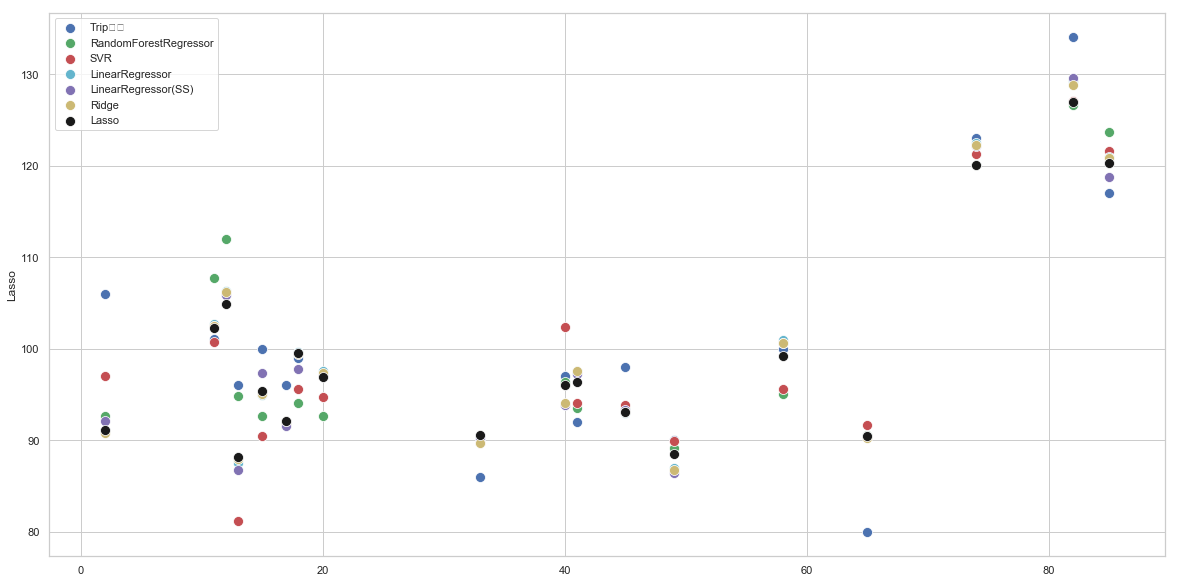

In [60]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")


for  c_idx, y_idx in zip( color, df_trip_comp.columns):
    sns.scatterplot(data=df_trip_comp,  x=  df_trip_comp.index , y= y_idx , color = c_idx , label=y_idx, s=100 )
 


<Figure size 720x720 with 0 Axes>

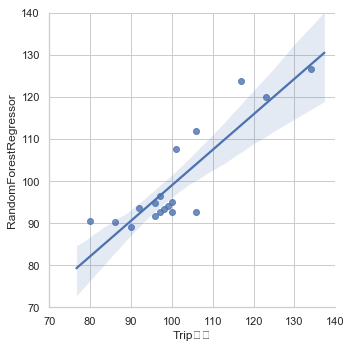

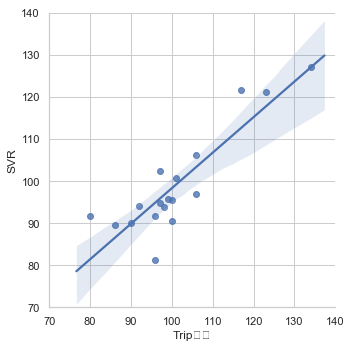

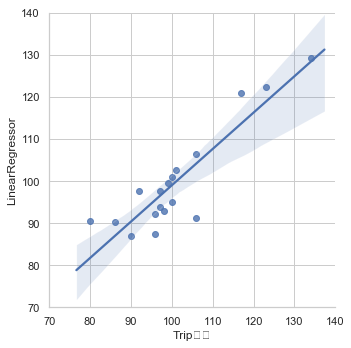

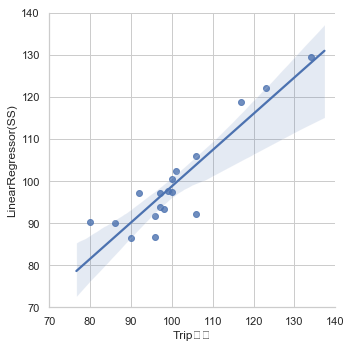

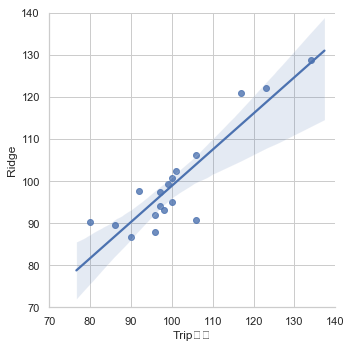

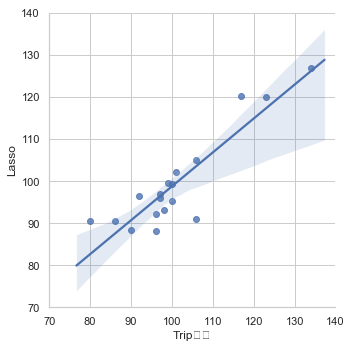

In [61]:
plt.figure(figsize=(10, 10))

for  c_idx, y_idx in zip( color, df_trip_comp.columns[1:]):
    g = sns.lmplot(data=df_trip_comp,  x=  df_trip_comp.columns[0] , y= y_idx ,palette=color)
    g.set(xlim=(70,140), ylim=(70,140))
    

<Figure size 720x720 with 0 Axes>

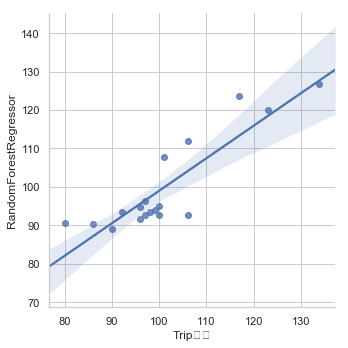

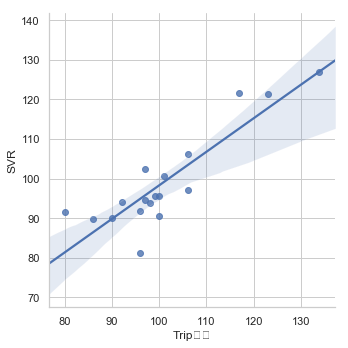

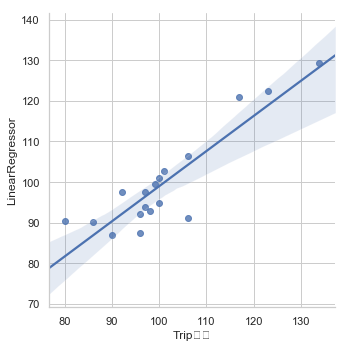

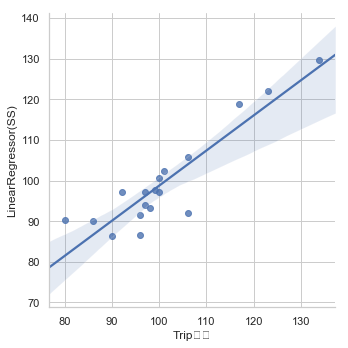

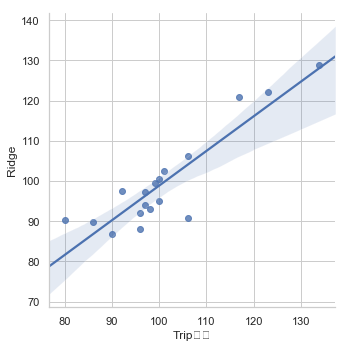

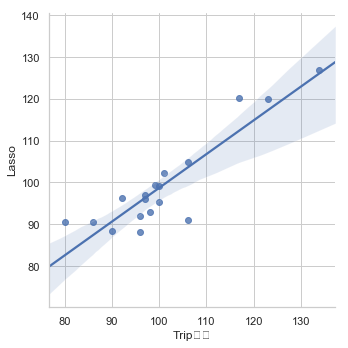

In [62]:
plt.figure(figsize=(10, 10))

for  c_idx, y_idx in zip( color, df_trip_comp.columns[1:]):
    g = sns.lmplot(data=df_trip_comp,  x=  df_trip_comp.columns[0] , y= y_idx ,palette=color)

In [63]:
## 모델별 성능 값 비교

#모델별 R squre 및 예측값 차이
score_comp =  {  'RandomForestRegressor' : selected_score_rfr,
                 'SVR' :  score_svr,
                 'LinearRegressor':  score_lr, 
                 'LinearRegressor(SS)':  score_lr_ss, 
                 'Ridge(SS)' :  selected_score_ridge_ss,
                 'Lasso(SS)' :  selected_score_lasso_ss }
                                 
df_score_comp  = pd.DataFrame(score_comp, index=['Train score', 'Test Score' , 'Trip Diff_Max' , 'Trip Diff_Mean' ])

#손실 함수
mse_comp =  {'RandomForestRegressor' : mse_rfr,
                  'SVR' :   mse_svr, 
                  'LinearRegressor':   mse_lr, 
                  'LinearRegressor(SS)':  mse_lr_ss, 
                  'Ridge(SS)' : mse_ridge, 
                  'Lasso(SS)' :  mse_lasso }


df_mse_comp = pd.DataFrame(mse_comp, index=['mse'])

df_comp = pd.concat([df_score_comp,df_mse_comp])

print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print(f"RandomForestRegressor의  estimator : {selected_n_estimator}, 훈련   score : {selected_score_rfr[1]:.5f}")
print(f"Ridge의  alpha : {selected_ridge_alpha:.2f}, 훈련   score : {selected_score_ridge_ss[1]:.5f}")
print(f"Lasso(SS)  alpha : {selected_lasso_alpha:.2f}, 훈련   score : {selected_score_lasso_ss[1]:.5f} \n")
print(f"MSE, MSLE 는 값이 작을 수록 좋음\n")
print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

display(df_comp)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RandomForestRegressor의  estimator : 90, 훈련   score : 0.76688
Ridge의  alpha : 0.05, 훈련   score : 0.79863
Lasso(SS)  alpha : 0.55, 훈련   score : 0.79883 

MSE, MSLE 는 값이 작을 수록 좋음

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



,RandomForestRegressor,SVR,LinearRegressor,LinearRegressor(SS),Ridge(SS),Lasso(SS)
Train score,0.971370,0.769104,0.861985,0.865111,0.859779,0.848702
Test Score,0.766879,0.747095,0.796377,0.813974,0.798627,0.798829
Trip Diff_Max,13.333333,14.867181,14.855348,13.877938,15.187138,14.935704
Trip Diff_Mean,0.666667,0.054365,0.323106,0.120599,0.127793,0.055527
mse,36.833189,39.958934,32.172463,29.392047,39.114534,131.798199


## 결과  : 위의 결과 LinearRegressor(SS) 이 모델에 제일 적합한 것으로 판단 됨

In [64]:
df_comp.T

,Train score,Test Score,Trip Diff_Max,Trip Diff_Mean,mse
RandomForestRegressor,0.971370,0.766879,13.333333,0.666667,36.833189
SVR,0.769104,0.747095,14.867181,0.054365,39.958934
LinearRegressor,0.861985,0.796377,14.855348,0.323106,32.172463
LinearRegressor(SS),0.865111,0.813974,13.877938,0.120599,29.392047
Ridge(SS),0.859779,0.798627,15.187138,0.127793,39.114534
Lasso(SS),0.848702,0.798829,14.935704,0.055527,131.798199


In [65]:
#교차 검증 CV = 5

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

n_splits  = 5

cv = KFold(n_splits, shuffle=True, random_state=7)

cv_score_rfr = cross_val_score(rfr, mccb_x, mccb_y, cv=cv)
cv_score_svr = cross_val_score(svr, mccb_x, mccb_y, cv=cv)
cv_score_lr = cross_val_score(lr, mccb_x, mccb_y, cv=cv)
cv_score_lr_ss = cross_val_score(lr_ss, x_ss, mccb_y, cv=cv)
cv_score_ridge = cross_val_score(ridge_ss, x_ss, mccb_y, cv=cv)
cv_score_lasso = cross_val_score(lasso_ss, x_ss, mccb_y, cv=cv)

print(f"교차 검증 분할 횟수 :{n_splits}")


교차 검증 분할 횟수 :5


In [66]:
cv_score_comp =  {'RandomForestRegressor' : cv_score_rfr, 
                  'SVR' :  cv_score_svr, 
                  'LinearRegressor':  cv_score_lr, 
                  'LinearRegressor(SS)':  cv_score_lr_ss, 
                  'Ridge(SS)' : cv_score_ridge, 
                  'Lasso(SS)' :  cv_score_lasso}

In [67]:
cv_score_comp_mean =  {'RandomForestRegressor' : cv_score_rfr.mean(), 
                  'SVR' :  cv_score_svr.mean(), 
                  'LinearRegressor':  cv_score_lr.mean(), 
                  'LinearRegressor(SS)':  cv_score_lr_ss.mean(), 
                  'Ridge(SS)' : cv_score_ridge.mean(), 
                  'Lasso(SS)' :  cv_score_lasso.mean() }

In [68]:
df_cv_score_comp= pd.DataFrame(cv_score_comp, index=['cv_score_1', 'cv_score_2', 'cv_score_3', 'cv_score_4', 'cv_score_5'])
df_cv_score_comp_max = pd.DataFrame(cv_score_comp_mean, index=['cv_score_mean'])

df_cv = pd.concat([df_cv_score_comp,df_cv_score_comp_max])
display(df_cv)

,RandomForestRegressor,SVR,LinearRegressor,LinearRegressor(SS),Ridge(SS),Lasso(SS)
cv_score_1,0.775318,0.747095,0.796377,0.808651,0.752440,0.165834
cv_score_2,0.798703,0.665596,0.827822,0.800032,0.815025,0.151494
cv_score_3,0.761948,0.841641,0.819249,0.835877,0.800342,-0.036149
cv_score_4,0.699016,0.569184,0.712126,0.712794,0.731287,0.141131
cv_score_5,0.900585,0.814194,0.862669,0.865432,0.866856,0.149343
cv_score_mean,0.787114,0.727542,0.803648,0.804557,0.793190,0.114331


#### 참고) 교차 예측 및 검증을 사용하였으나, Split의 마지막 값만 출력 되어 의미 예측 값을 어디에 사용하기는 힘듦

In [69]:
#교차 예측 및 검증 CV = 5

from sklearn.model_selection import cross_val_predict

cv_pred_rfr = cross_val_predict(rfr, mccb_x, mccb_y, cv=cv)
cv_pred_svr = cross_val_predict(svr, mccb_x, mccb_y, cv=cv)
cv_pred_lr = cross_val_predict(lr, mccb_x, mccb_y, cv=cv)
cv_pred_lr_ss = cross_val_predict(lr_ss, x_ss, mccb_y, cv=cv)
cv_pred_ridge = cross_val_predict(ridge_ss, x_ss, mccb_y, cv=cv)
cv_pred_lasso = cross_val_predict(lasso_ss, x_ss, mccb_y, cv=cv)


In [70]:
cv_pred_comp =  { #'Trip시간': y_test,
                  'RandomForestRegressor' : cv_pred_rfr, 
                  'SVR' :  cv_pred_svr, 
                  'LinearRegressor':  cv_pred_lr, 
                  'LinearRegressor(SS)':  cv_pred_lr_ss, 
                  'Ridge(SS)' : cv_pred_ridge, 
                  'Lasso(SS)' :  cv_pred_lasso }

df_cv_pred_comp= pd.DataFrame(cv_pred_comp)
df_cv_pred_comp

,RandomForestRegressor,SVR,LinearRegressor,LinearRegressor(SS),Ridge(SS),Lasso(SS)
0,96.633333,98.093950,100.981917,101.576044,99.848999,101.169332
1,96.788889,90.720252,94.590355,92.518116,95.285693,100.616069
2,93.155556,97.006034,91.144652,92.046415,90.652610,101.043359
3,93.611111,89.485555,86.045169,84.342335,87.889672,100.590816
4,96.900000,87.928801,95.452296,96.518116,95.421132,100.563119
5,98.888889,104.638387,101.015785,100.952899,99.793475,101.411272
6,92.622222,75.061679,79.380731,79.984149,85.248048,98.543007
7,97.477778,99.205479,101.292017,102.513544,99.005401,101.470317
8,97.155556,93.971107,106.684462,105.419794,104.796109,100.517200
9,102.411111,103.210520,105.333689,106.140399,103.473132,101.484116


#### 참고) Leave One Out :  의미가 없음을 확인함

In [71]:
#교차 검증 (LOOCV)
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
cv_score_rfr = cross_val_score(rfr, mccb_x, mccb_y, cv=loo)
cv_score_svr = cross_val_score(svr, mccb_x, mccb_y, cv=loo)
cv_score_lr = cross_val_score(lr, mccb_x, mccb_y, cv=loo)
cv_score_lr_ss = cross_val_score(lr_ss, x_ss, mccb_y, cv=loo)
cv_score_ridge = cross_val_score(ridge_ss, x_ss, mccb_y, cv=loo)
cv_score_lasso = cross_val_score(lasso_ss, x_ss, mccb_y, cv=loo)

print(f"교차 검증 분할 횟수 :{len(cv_score_svr)}")

교차 검증 분할 횟수 :86


In [72]:
cv_score_comp =  {'RandomForestRegressor' : cv_score_rfr.mean(), 
                  'SVR' :  cv_score_svr.mean(), 
                  'LinearRegressor':  cv_score_lr.mean(), 
                  'LinearRegressor(SS)':  cv_score_lr_ss.mean(), 
                  'Ridge(SS)' : cv_score_ridge.mean(), 
                  'Lasso(SS)' :  cv_score_lasso.mean() }

display(cv_score_comp)

{'RandomForestRegressor': 0.0,
 'SVR': 0.0,
 'LinearRegressor': 0.0,
 'LinearRegressor(SS)': 0.0,
 'Ridge(SS)': 0.0,
 'Lasso(SS)': 0.0}

## MLP

In [103]:
# define model
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

# define model
mlp_model = Sequential()
mlp_model.add(Dense(70,input_shape=(len(mccb_x.columns),),activation='relu'))
mlp_model.add(Dense(50,activation='relu'))
mlp_model.add(Dense(1,activation='relu'))

mlp_model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['accuracy']) #회귀 모델

#13를 Step으로 1개의 유추하는 것인데..
mlp_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 70)                980       
_________________________________________________________________
dense_23 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________


In [104]:
# fit model
hist_mlp = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 68 samples, validate on 18 samples
Epoch 1/100
68/68 [==============================] - 0s 5ms/step - loss: 6555.3307 - acc: 0.0000e+00 - val_loss: 2886.1938 - val_acc: 0.0000e+00
Epoch 2/100
68/68 [==============================] - 0s 132us/step - loss: 2420.7338 - acc: 0.0000e+00 - val_loss: 550.9531 - val_acc: 0.0000e+00
Epoch 3/100
68/68 [==============================] - 0s 132us/step - loss: 447.1599 - acc: 0.0294 - val_loss: 298.0200 - val_acc: 0.0556
Epoch 4/100
68/68 [==============================] - 0s 147us/step - loss: 324.0750 - acc: 0.0000e+00 - val_loss: 948.1124 - val_acc: 0.0000e+00
Epoch 5/100
68/68 [==============================] - 0s 162us/step - loss: 841.7799 - acc: 0.0000e+00 - val_loss: 1179.5076 - val_acc: 0.0556
Epoch 6/100
68/68 [==============================] - 0s 147us/step - loss: 935.0025 - acc: 0.0000e+00 - val_loss: 854.7991 - val_acc: 0.0000e+00
Epoch 7/100
68/68 [==============================] - 0s 132us/step - loss: 612.1204 - acc: 0.000

Epoch 59/100
68/68 [==============================] - 0s 191us/step - loss: 144.1062 - acc: 0.0000e+00 - val_loss: 205.1313 - val_acc: 0.0000e+00
Epoch 60/100
68/68 [==============================] - 0s 118us/step - loss: 160.7965 - acc: 0.0147 - val_loss: 225.4776 - val_acc: 0.0000e+00
Epoch 61/100
68/68 [==============================] - 0s 147us/step - loss: 172.4273 - acc: 0.0000e+00 - val_loss: 203.0550 - val_acc: 0.0000e+00
Epoch 62/100
68/68 [==============================] - 0s 147us/step - loss: 156.5945 - acc: 0.0000e+00 - val_loss: 176.4048 - val_acc: 0.0000e+00
Epoch 63/100
68/68 [==============================] - 0s 176us/step - loss: 144.0737 - acc: 0.0000e+00 - val_loss: 167.1127 - val_acc: 0.0556
Epoch 64/100
68/68 [==============================] - 0s 132us/step - loss: 146.7023 - acc: 0.0588 - val_loss: 168.2683 - val_acc: 0.0556
Epoch 65/100
68/68 [==============================] - 0s 147us/step - loss: 158.2939 - acc: 0.0000e+00 - val_loss: 170.3886 - val_acc: 0.055

In [105]:
# demonstrate prediction
y_pred_mlp = mlp_model.predict(X_test, verbose=1)

18/18 [==============================] - 0s 4ms/step


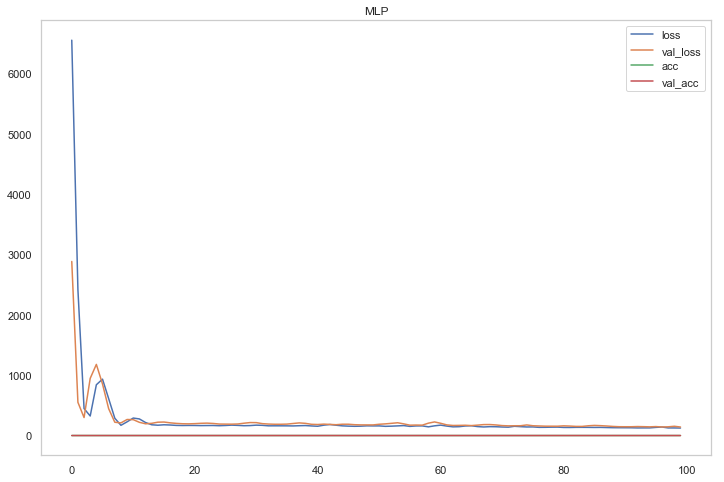

In [106]:
plt.figure(figsize=(12,8))
plt.plot(hist_mlp.history['loss'])
plt.plot(hist_mlp.history['val_loss'])
plt.plot(hist_mlp.history['acc'])
plt.plot(hist_mlp.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.title("MLP")
plt.grid()
plt.show()

In [107]:
score_mlp = r2_score(y_test, y_pred_mlp )
print(f"R2 score = {score_mlp}")

print(f"\n")
test_loss_mlp, test_acc_mlp = mlp_model.evaluate(X_test, y_test)

print(f"test_loss : {test_loss_mlp}")
print(f"test_acc  : {test_acc_mlp}")

R2 score = 0.10604049019133932


18/18 [==============================] - 0s 667us/step
test_loss : 141.24560546875
test_acc  : 0.0555555559694767


## CNN

In [108]:
len(mccb_x.columns)

13

In [120]:
from keras import layers
from keras import models
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import r2_score

#13를 Step으로 1개의 유추하는 것인데..
n_features = 1
cnn_model = Sequential()
cnn_model.add(Conv1D(32, 2, activation='relu', input_shape=(len(mccb_x.columns), n_features))) 
cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
cnn_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 12, 32)            96        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1930      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 2,037
Trainable params: 2,037
Non-trainable params: 0
_________________________________________________________________


In [121]:
X_train_array.shape

(68, 13, 1)

In [122]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
X_train_array = X_train.as_matrix(columns=None)
X_test_array = X_test.values

X_train_array = X_train_array.reshape((-1, len(mccb_x.columns), 1))
X_test_array = X_test_array.reshape((-1, len(mccb_x.columns), 1))

# fit model
hist_cnn = cnn_model.fit(X_train_array, y_train, validation_data=(X_test_array, y_test), epochs=100)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Train on 68 samples, validate on 18 samples
Epoch 1/100
68/68 [==============================] - 0s 6ms/step - loss: 829.6894 - acc: 0.0000e+00 - val_loss: 524.0291 - val_acc: 0.0000e+00
Epoch 2/100
68/68 [==============================] - 0s 147us/step - loss: 327.5898 - acc: 0.0294 - val_loss: 259.3290 - val_acc: 0.0000e+00
Epoch 3/100
68/68 [==============================] - 0s 147us/step - loss: 249.1946 - acc: 0.0147 - val_loss: 307.6631 - val_acc: 0.0000e+00
Epoch 4/100
68/68 [==============================] - 0s 147us/step - loss: 350.7447 - acc: 0.0441 - val_loss: 348.3156 - val_acc: 0.1111
Epoch 5/100
68/68 [==============================] - 0s 206us/step - loss: 377.2719 - acc: 0.0294 - val_loss: 304.3737 - val_acc: 0.0000e+00
Epoch 6/100
68/68 [==============================] - 0s 118us/step - loss: 308.5463 - acc: 0.0588 - val_loss: 255.3092 - val_acc: 0.0000e+00
Epoch 7/100
68/68 [==============================] - 0s 132us/step - loss: 238.1434 - acc: 0.0000e+00 - val_loss

68/68 [==============================] - 0s 235us/step - loss: 182.6420 - acc: 0.0147 - val_loss: 211.8265 - val_acc: 0.0556
Epoch 59/100
68/68 [==============================] - 0s 147us/step - loss: 182.7289 - acc: 0.0294 - val_loss: 208.2903 - val_acc: 0.0556
Epoch 60/100
68/68 [==============================] - 0s 147us/step - loss: 183.4762 - acc: 0.0000e+00 - val_loss: 213.0346 - val_acc: 0.1111
Epoch 61/100
68/68 [==============================] - 0s 176us/step - loss: 180.6644 - acc: 0.0294 - val_loss: 216.4619 - val_acc: 0.0556
Epoch 62/100
68/68 [==============================] - 0s 147us/step - loss: 180.7331 - acc: 0.0000e+00 - val_loss: 215.2828 - val_acc: 0.0556
Epoch 63/100
68/68 [==============================] - 0s 176us/step - loss: 178.4308 - acc: 0.0147 - val_loss: 207.6259 - val_acc: 0.0556
Epoch 64/100
68/68 [==============================] - 0s 162us/step - loss: 177.4347 - acc: 0.0147 - val_loss: 205.5362 - val_acc: 0.0556
Epoch 65/100
68/68 [===================

In [123]:
# demonstrate prediction
# X_test = X_test.reshape((-1, n_steps, n_features))
y_pred_cnn = cnn_model.predict(X_test_array, verbose=1)

18/18 [==============================] - 0s 8ms/step


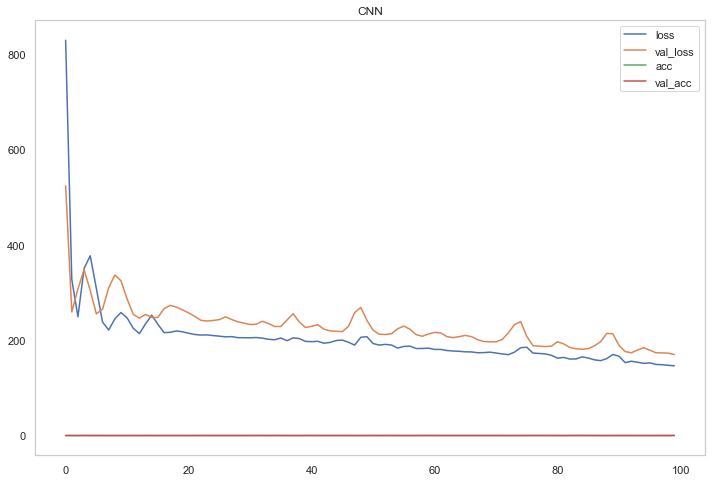

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist_cnn.history['loss'])
plt.plot(hist_cnn.history['val_loss'])
plt.plot(hist_cnn.history['acc'])
plt.plot(hist_cnn.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.title("CNN")
plt.grid()
plt.show()

In [125]:
score_cnn = r2_score(y_test, y_pred_cnn )
print(f"R2 score = {score_cnn}")

print(f"\n")
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test_array, y_test)

print(f"test_loss : {test_loss_cnn}")
print(f"test_acc  : {test_acc_cnn}")

R2 score = -0.07575799454877585


18/18 [==============================] - 0s 444us/step
test_loss : 169.9697723388672
test_acc  : 0.1111111119389534
